In [2]:
import numpy as np
import scipy.constants as const
import scipy.stats as sstats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
import matplotlib.patches as patches

from matplotlib.ticker import LogFormatter
import palettable
from matplotlib.ticker import NullFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable

# rcParams.update({"figure.autolayout": True})

sns.set_context("paper")
sns.set_style(
    {
        "xtick.direction": "in",
        "ytick.direction": "in",
        "xtick.bottom": True,
        "xtick.top": True,
        "ytick.left": True,
        "ytick.right": True,
        "axes.spines.left": True,
        "axes.spines.bottom": True,
        "axes.spines.right": True,
        "axes.spines.top": True,
        "axes.grid": False,
        "grid.color": ".8",
        "figure.facecolor": "white",
        "axes.facecolor": "white",
    }
)

colors1 = palettable.cartocolors.qualitative.Bold_10.mpl_colors
import ipywidgets as widgets


In [3]:
def get_xy_rms_beam_size_plus_aper(fname):
    #rms_f = pd.read_excel(fname,header=0, skiprows=1,engine='xlrd')
    rms_f = pd.read_csv(fname,sep='\t',skiprows=0,header=0)
    rms_f.head()
    length = rms_f['Length [m]'].to_numpy()
    x_rms = rms_f[' x beam size in wanted emittance [m]'].to_numpy()
    y_rms = rms_f[' y beam size in wanted emittance [m]'].to_numpy()
    aper_x = rms_f['Aperture x [m]'].to_numpy()
    aper_y = rms_f['Aperture y [m]'].to_numpy()
    eps_rms_x = rms_f["(X,BGX') RMS-Emittance [m.rad]"].to_numpy()
    eps_rms_y = rms_f["(Y,BGY') RMS-Emittance [m.rad]"].to_numpy()
    eps_rms_y = rms_f["(Y,BGY') RMS-Emittance [m.rad]"].to_numpy()
    return length,x_rms, y_rms, aper_x, aper_y, eps_rms_x, eps_rms_y

In [4]:
def get_beam_loss_map(fname):
    deadray_f = pd.read_csv(fname,sep='\t',skiprows=0,header=0)
    z_dead = deadray_f['z [m]'].to_numpy()
    return z_dead

In [5]:
def plot_beam_centre(fname):
    avg_f = pd.read_csv(fname,sep='\t',skiprows=0,header=0)
    length = avg_f['Length [m]'].to_numpy()
    x_avg = avg_f['x Average [m]'].to_numpy()
    xp_avg = avg_f["x' Average [rad]"].to_numpy()
    y_avg = avg_f['y Average [m]'].to_numpy()
    yp_avg = avg_f["y' Average [rad]"].to_numpy()
    KE_avg = avg_f["Kinetic Energy Average [GeV]"].to_numpy()
    E_rest = avg_f["Rest Energy Average [GeV]"].to_numpy()
    gamma0 = np.ones_like(KE_avg) + np.divide(KE_avg, E_rest)
    beta0 = np.sqrt(np.ones_like(gamma0) - np.divide(np.ones_like(gamma0), np.power(gamma0,2)))
    fig, axs= plt.subplots(2, 1, sharex=True, figsize=(10, 3))
    fig.subplots_adjust(hspace=0)
    axs[0].plot(length, x_avg * 1e3, color=colors1[0], label='x')
    axs[0].plot(length, y_avg * 1e3, color=colors1[0], label='y', linestyle='--')
    axs[0].set_xlabel('s / m')
    axs[0].set_ylabel("x, y / mm")
    axs[0].legend()
    axs[1].plot(length, xp_avg * 1e3, color=colors1[1], label="x'")
    axs[1].plot(length, yp_avg * 1e3, color=colors1[1], label="y'", linestyle='--')
    axs[1].set_xlabel('s / m')
    axs[1].set_ylabel("x', y' / mrad")
    axs[1].legend()
    for axsi in [axs[0], axs[1]]:
        axsi.vlines(x=0.053 + 0.6 + 0.3824 + 0.4926 + 0.6+ 0.02, ymin=-50, ymax=50, color='red', linewidth=0.5, alpha=0.8)
        axsi.vlines(x=0.053 + 0.6 + 0.3824 + 0.4926 + 0.6+ 0.02 + 0.0267, ymin=-50, ymax=50, color='red', linewidth=0.5, alpha=0.8)
        axsi.vlines(x=0.053 + 0.6 + 0.3824 + 0.4926 + 0.6+ 0.02 + 0.0267 + 0.0114, ymin=-50, ymax=50, color='red', linewidth=0.5, alpha=0.8)
        axsi.vlines(x=0.053 + 0.6 + 0.3824 + 0.4926 + 0.6+ 0.02 + 0.0267 + 0.0114 + 0.0242, ymin=-50, ymax=50, color='red', linewidth=0.5, alpha=0.8)
    axs[0].fill_betweenx([-50, 50], 0.053, 0.053 + 0.6, color="teal", alpha=0.1)
    axs[1].fill_betweenx([-50, 50], 0.053, 0.053 + 0.6, color="teal", alpha=0.1)
    axs[0].fill_betweenx(
        [-50, 50],
        0.053 + 0.6 + 0.3824 + 0.4926,
        0.053 + 0.6 + 0.3824 + 0.4926 + 0.6,
        color="teal",
        alpha=0.1,
    )
    axs[1].fill_betweenx(
        [-50, 50],
        0.053 + 0.6 + 0.3824 + 0.4926,
        0.053 + 0.6 + 0.3824 + 0.4926 + 0.6,
        color="teal",
        alpha=0.1,
    )

    axs[0].fill_betweenx(
        [-50, 50],
        0.053 + 0.6 + 0.3824 + 0.4926 + 0.6+ 0.02,
        0.053 + 0.6 + 0.3824 + 0.4926 + 0.6 + 0.02 + 0.0267 +  0.0114 + 0.0242,
        color="red",
        alpha=0.1,
    )
    axs[1].fill_betweenx(
        [-50, 50],
        0.053 + 0.6 + 0.3824 + 0.4926 + 0.6+ 0.02,
        0.053 + 0.6 + 0.3824 + 0.4926 + 0.6 + 0.02 + 0.0267 +  0.0114 + 0.0242,
        color="red",
        alpha=0.1,
    )

    axs[0].fill_betweenx(
        [-50, 50],
        0.0,
        0.053,
        color="green",
        alpha=0.1,
    )
    axs[1].fill_betweenx(
        [-50, 50],
        0.0,
        0.053,
        color="green",
        alpha=0.1,
    )
    axs[0].set_ylim([np.min([np.min(x_avg),np.min(y_avg)]) * 1.1e3, np.max([np.max(x_avg),np.max(y_avg)]) * 1.1e3])
    axs[1].set_ylim([np.min([np.min(xp_avg),np.min(yp_avg)]) * 1.1e3, np.max([np.max(xp_avg),np.max(yp_avg)]) * 1.1e3])
    axs[0].hlines(0.0, np.min(length) * 1.1, np.max(length) * 1.1, color='black')
    axs[1].hlines(0.0, np.min(length) * 1.1, np.max(length) * 1.1, color='black')

In [70]:
def plot_beam_size_evolution(fname_avg,fname_rms, fname_deadray, title_in, N_ptcls, emit_lims):
    s, x, y, ax, ay, eps_x_rms, eps_y_rms = get_xy_rms_beam_size_plus_aper(fname_rms)
    s = np.add(s, np.ones_like(s) * 0.053 *0)
    avg_f = pd.read_csv(fname_avg,sep='\t',skiprows=0,header=0)
    length = avg_f['Length [m]'].to_numpy()
    x_avg = avg_f['x Average [m]'].to_numpy()
    xp_avg = avg_f["x' Average [rad]"].to_numpy()
    y_avg = avg_f['y Average [m]'].to_numpy()
    yp_avg = avg_f["y' Average [rad]"].to_numpy()
    KE_avg = avg_f["Kinetic Energy Average [GeV]"].to_numpy()
    E_rest = avg_f["Rest Energy Average [GeV]"].to_numpy()
    gamma0 = np.ones_like(KE_avg) + np.divide(KE_avg, E_rest)
    beta0 = np.sqrt(np.ones_like(gamma0) - np.divide(np.ones_like(gamma0), np.power(gamma0,2)))
    norm_emit_x = eps_x_rms# * beta0 * gamma0
    norm_emit_y = eps_y_rms# * beta0 * gamma0
    #print(norm_emit_x[0])
    #norm_emit_x *= np.pi
    #norm_emit_y *= np.pi
    np.clip(x, a_min=0.0, a_max=5e-2, out=x)
    np.clip(y, a_min=0.0, a_max=5e-2, out=y)
    z_dead = get_beam_loss_map(fname_deadray)
    z_dead = np.add(z_dead, np.ones_like(z_dead) * 0.053*0)
    gridspec = dict(hspace=0.0, height_ratios=[1, 1, 1, 2])
    fig, axs = plt.subplots(4, 1, sharex=True, figsize=(10, 5), gridspec_kw=gridspec)
    #fig.subplots_adjust(hspace=0)
    # plt.gca().set_prop_cycle(
    #     "color", palettable.cartocolors.qualitative.Bold_4.mpl_colors
    # )
    axs[0].plot(s, x * 1e3, color = colors1[2])
    axs[0].fill_between(s,0,x*1e3, color = colors1[2], zorder=3)
    axs[1].plot(s, y * 1e3, color = colors1[2])
    axs[1].fill_between(s,0,y*1e3, color ='none', hatch='//////', edgecolor=colors1[2], zorder=3)
    axs[1].invert_yaxis()
    plt.xlabel("s / m")
    axs[0].set_ylabel(r"$x_{3\sigma}$ / mm")
    axs[1].set_ylabel(r"$y_{3\sigma}$ / mm")
    axs[0].plot(s[ax > 0], ax[ax > 0] * 1e3, color="black")
    axs[1].plot(s[ay > 0], ax[ay > 0] * 1e3, color="black")
    axs[0].set_ylim([0, 60])
    axs[1].set_ylim([60, 0])
    axs[0].fill_betweenx([0, 50], 0.053, 0.053 + 0.6, color="teal", alpha=0.1)
    axs[1].fill_betweenx([0, 50], 0.053, 0.053 + 0.6, color="teal", alpha=0.1)
    axs[0].fill_betweenx(
        [0, 50],
        0.053 + 0.6 + 0.3824 + 0.4926,
        0.053 + 0.6 + 0.3824 + 0.4926 + 0.6,
        color="teal",
        alpha=0.1,
    )
    axs[1].fill_betweenx(
        [0, 50],
        0.053 + 0.6 + 0.3824 + 0.4926,
        0.053 + 0.6 + 0.3824 + 0.4926 + 0.6,
        color="teal",
        alpha=0.1,
    )

    axs[0].fill_betweenx(
        [0, 50],
        0.053 + 0.6 + 0.3824 + 0.4926 + 0.6+ 0.02,
        0.053 + 0.6 + 0.3824 + 0.4926 + 0.6 + 0.02 + 0.0267 +  0.0114 + 0.0242,
        color="red",
        alpha=0.1,
    )
    axs[1].fill_betweenx(
        [0, 50],
        0.053 + 0.6 + 0.3824 + 0.4926 + 0.6+ 0.02,
        0.053 + 0.6 + 0.3824 + 0.4926 + 0.6 + 0.02 + 0.0267 +  0.0114 + 0.0242,
        color="red",
        alpha=0.1,
    )

    axs[0].fill_betweenx(
        [0, 50],
        0.0,
        0.053,
        color="green",
        alpha=0.1,
    )
    axs[1].fill_betweenx(
        [0, 50],
        0.0,
        0.053,
        color="green",
        alpha=0.1,
    )
    axs[0].vlines(0.053 + 0.6 + 0.3824 + 0.4926 + 0.6 + 0.02 + 0.0267 +  0.0114 + 0.0242 + 0.0242, 0, 50, color='black', ls='--')
    axs[1].vlines(0.053 + 0.6 + 0.3824 + 0.4926 + 0.6 + 0.02 + 0.0267 +  0.0114 + 0.0242 + 0.0242, 0, 50, color='black', ls='--')
    axs[0].vlines(0.053 + 0.6 + 0.3824 , 0, 50, color='black', ls='--')
    axs[1].vlines(0.053 + 0.6 + 0.3824 , 0, 50, color='black', ls='--')
    axs[0].set_title(title_in)
    axs[1].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    axs[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=True,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    axs[1].set_yticks([0,20,40])
    bl_hist_bins, b_aux, p_aux= axs[2].hist(z_dead, cumulative=True, weights = 100 / N_ptcls * np.ones_like(z_dead), histtype='step', ec='black', color='teal',  bins=1000, linewidth=1.5)
    #axs[2].semilogy()
    axs[2].set_ylabel('Beam' + '\n' +'loss [%]')
    #axs[2].set_ylim([0, 100])
    axs[2].tick_params(axis='y', which='both')
    axs[2].grid(True, axis='y')
    #axs[2].set_yticks([0, 25, 50 ,75, 100])

    ax2 = axs[3]
    ax2.plot(s,norm_emit_x * 1e6, color='red', label='x')
    ax2.plot(s,norm_emit_y * 1e6, color='blue', label='y')
    ax2.legend(ncols=2)
    ax2.set_ylabel(r"$\epsilon_{\mathrm{n,rms}}$ / mm mrad", color='black')
    ax2.tick_params(axis='y', colors='black')
    ax2.set_ylim(emit_lims)
    #ax2.invert_yaxis()
    for axsi in [axs[0], axs[1]]:
        axsi.vlines(x=0.053 + 0.6 + 0.3824 + 0.4926 + 0.6+ 0.02, ymin=0, ymax=50, color='red', linewidth=0.5, alpha=0.8)
        axsi.vlines(x=0.053 + 0.6 + 0.3824 + 0.4926 + 0.6+ 0.02 + 0.0267, ymin=0, ymax=50, color='red', linewidth=0.5, alpha=0.8)
        axsi.vlines(x=0.053 + 0.6 + 0.3824 + 0.4926 + 0.6+ 0.02 + 0.0267 + 0.0114, ymin=0, ymax=50, color='red', linewidth=0.5, alpha=0.8)
        axsi.vlines(x=0.053 + 0.6 + 0.3824 + 0.4926 + 0.6+ 0.02 + 0.0267 + 0.0114 + 0.0242, ymin=0, ymax=50, color='red', linewidth=0.5, alpha=0.8)
    
    axs[2].annotate('{:.2f} %'.format(bl_hist_bins[-1]),[s[-1],bl_hist_bins[-1]], (-20, 5), 'data', 'offset points',bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0'))
    ax2.grid(True, axis='y')
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")
    return fig

The following plots show the effect of changing the strength of the 1st solenoid.

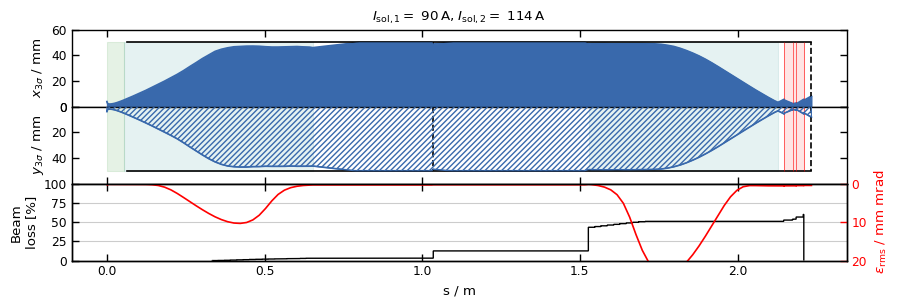

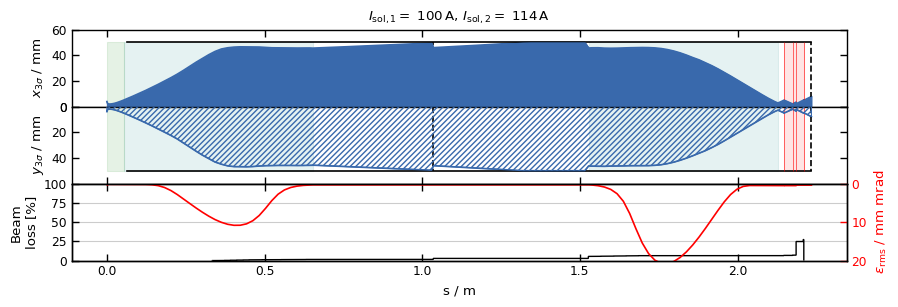

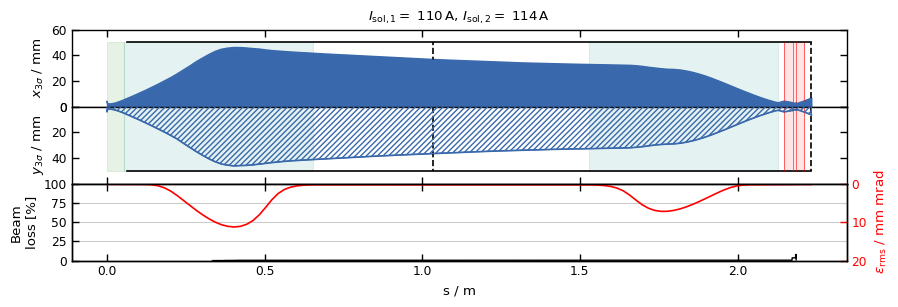

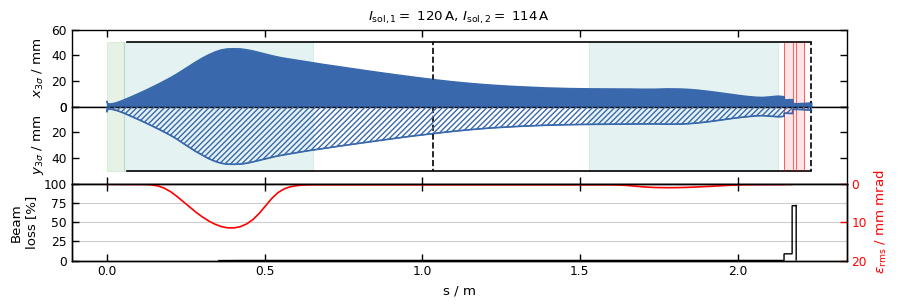

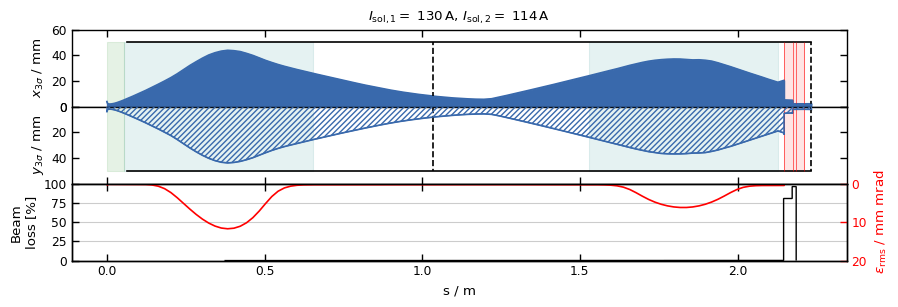

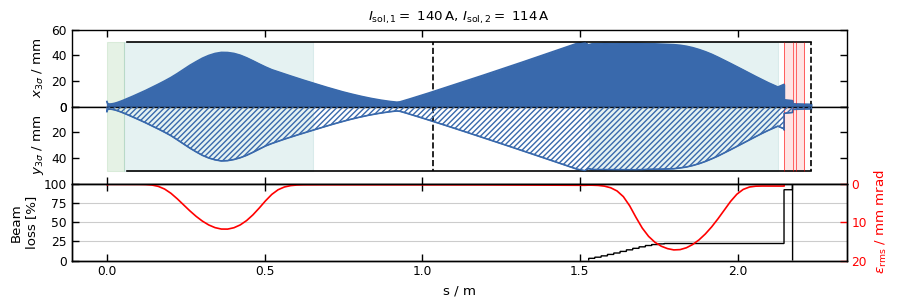

In [36]:
fig2 = plot_beam_size_evolution('RMS6.xls', 'DEADRAY6.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A".format(90, 145 * 0.783 ), 51006)
fig2 = plot_beam_size_evolution('RMS1.xls', 'DEADRAY1.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A".format(100, 145 * 0.783 ), 51006)
fig2 = plot_beam_size_evolution('RMS2.xls', 'DEADRAY2.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A".format(110, 145 * 0.783 ), 51006)
fig2 = plot_beam_size_evolution('RMS3.xls', 'DEADRAY3.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A".format(120, 145 * 0.783 ), 51006)
fig2 = plot_beam_size_evolution('RMS4.xls', 'DEADRAY4.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A".format(130, 145 * 0.783 ), 51006)
fig2 = plot_beam_size_evolution('RMS5.xls', 'DEADRAY5.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A".format(140, 145 * 0.783 ), 51006)

**Comments:** The beam from the source expands in the 1st solenoid with a large divergence in the first few cm after the extraction electrodes. Increasing the current in the 1st solenoid above ~100A is needed to avoid beam scrapping. With the strength of the 2nd solenoid fixed, it seems like the beam loss in the acceptance box is minimized when the beam is relatively large and slowly converging at the entrance of the 2nd solenoid.

The following plots show the effect of changing the strength of the 2nd solenoid.

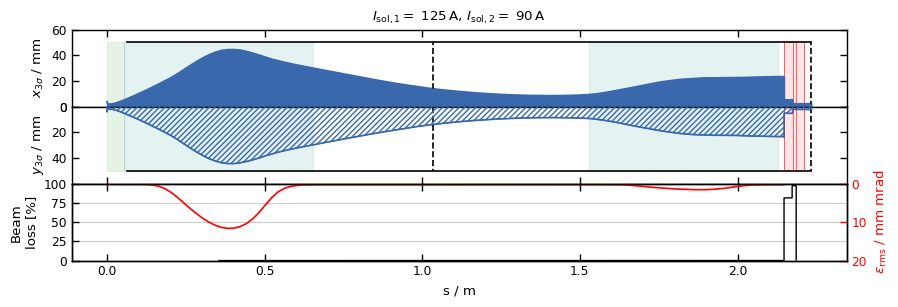

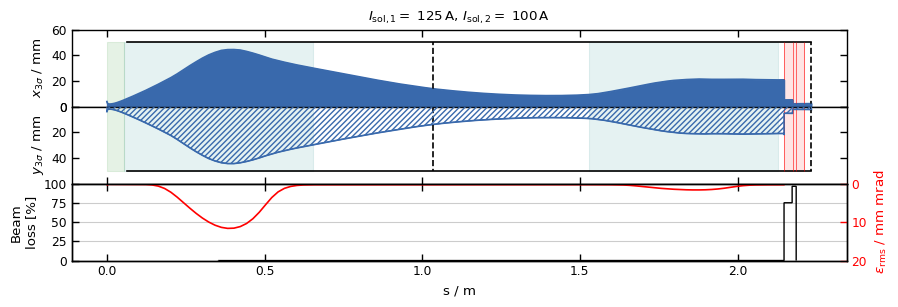

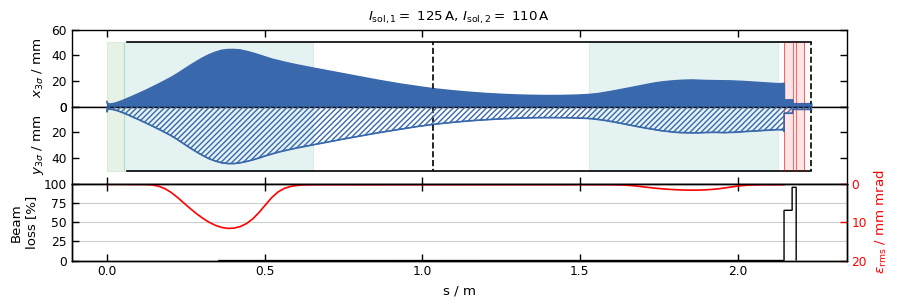

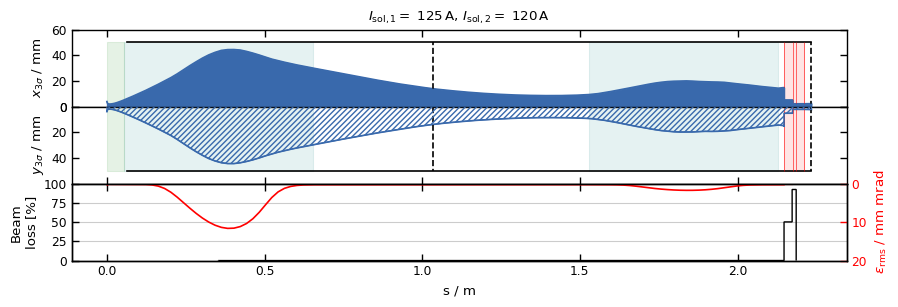

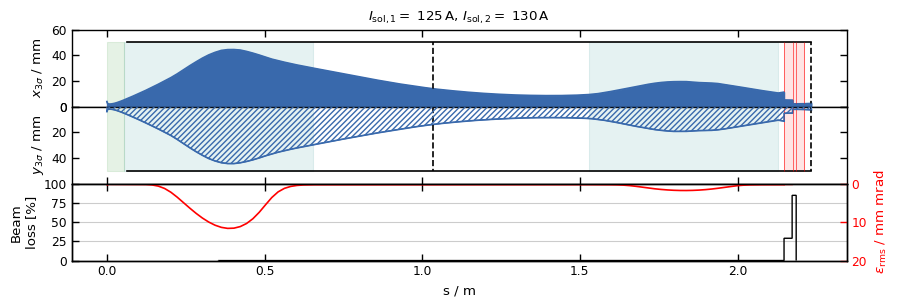

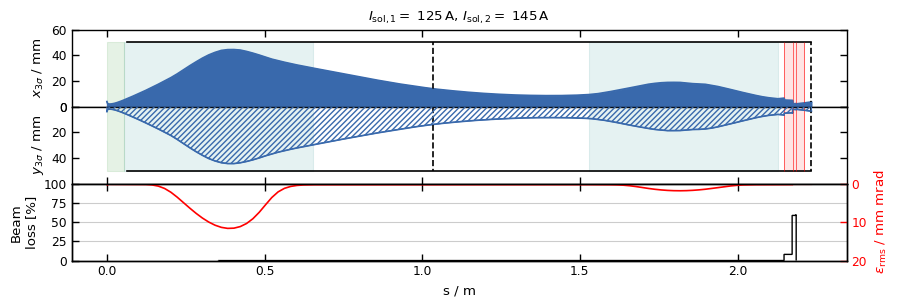

In [37]:
fig2 = plot_beam_size_evolution('RMS7.xls', 'DEADRAY7.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A".format(145 * 0.8621, 90), 51006)
fig2 = plot_beam_size_evolution('RMS8.xls', 'DEADRAY8.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A".format(145 * 0.8621, 100), 51006)
fig2 = plot_beam_size_evolution('RMS9.xls', 'DEADRAY9.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A".format(145 * 0.8621, 110), 51006)
fig2 = plot_beam_size_evolution('RMS10.xls', 'DEADRAY10.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A".format(145 * 0.8621, 120), 51006)
fig2 = plot_beam_size_evolution('RMS11.xls', 'DEADRAY11.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A".format(145 * 0.8621, 130), 51006)
fig2 = plot_beam_size_evolution('RMS12.xls', 'DEADRAY12.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A".format(145 * 0.8621, 145), 51006)

If the waist of the beam is before the 2nd solenoid, the strength of the 2nd solenoids needs to be higher to focus the beam to a small spot size.

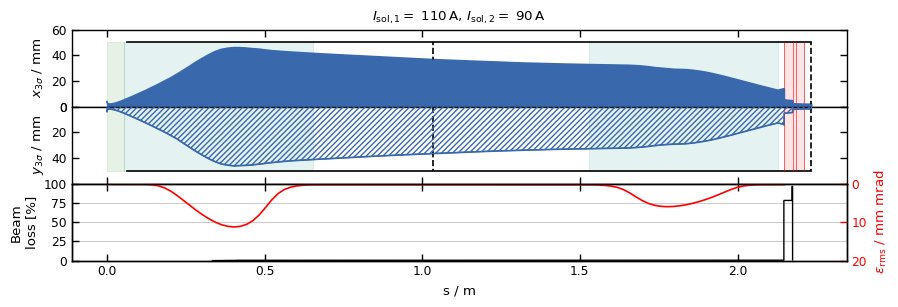

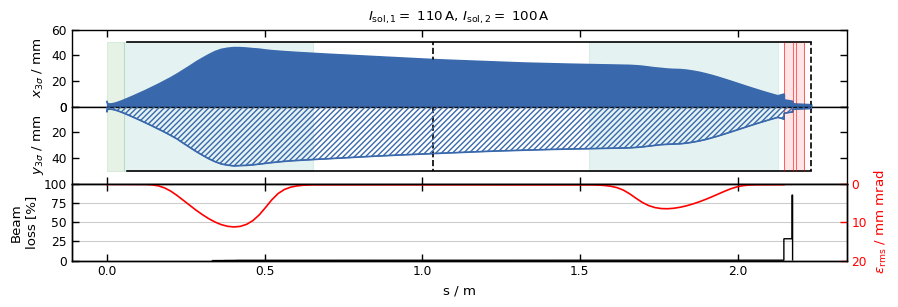

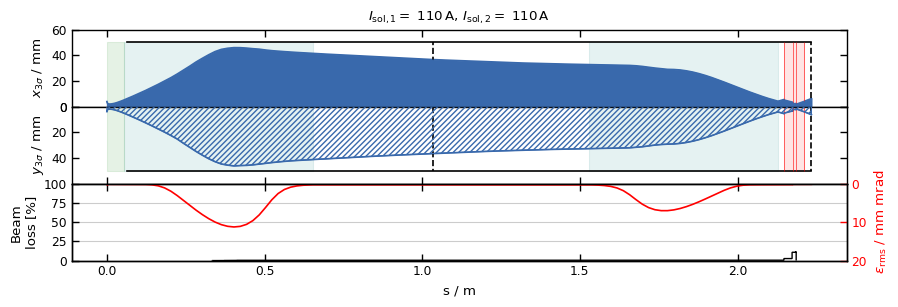

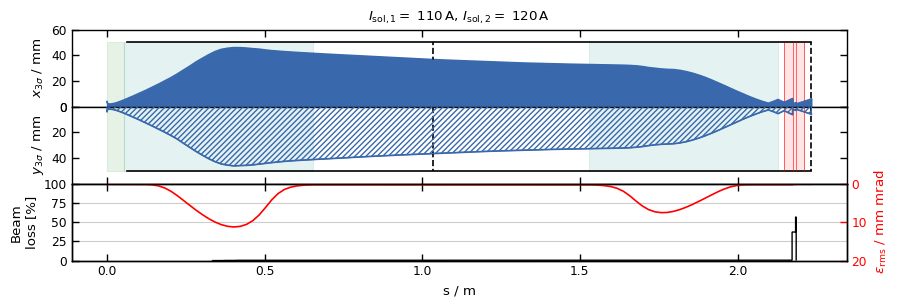

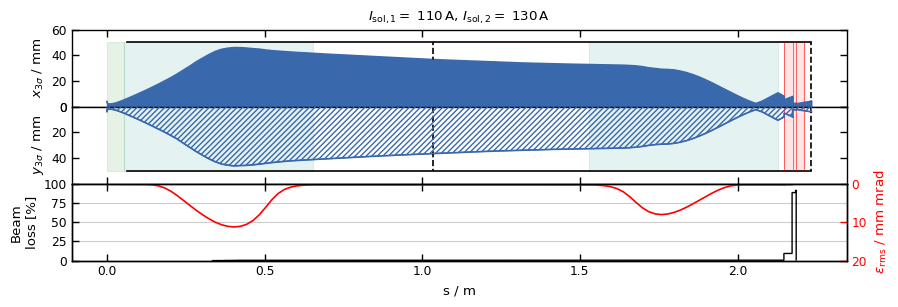

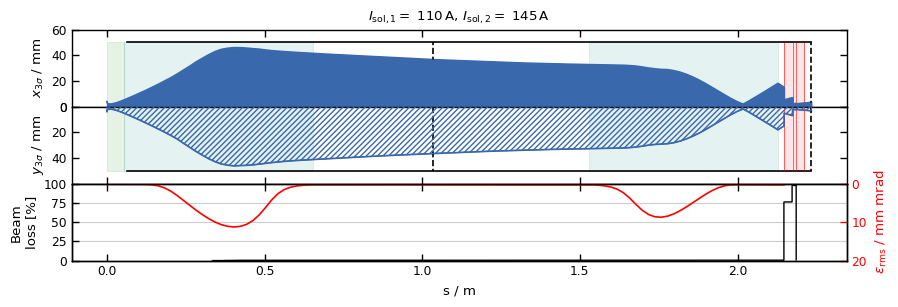

In [38]:
fig2 = plot_beam_size_evolution('RMS13.xls', 'DEADRAY13.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A".format(145 * 0.758620, 90), 51006)
fig2 = plot_beam_size_evolution('RMS14.xls', 'DEADRAY14.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A".format(145 * 0.758620, 100), 51006)
fig2 = plot_beam_size_evolution('RMS15.xls', 'DEADRAY15.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A".format(145 * 0.758620, 110), 51006)
fig2 = plot_beam_size_evolution('RMS16.xls', 'DEADRAY16.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A".format(145 * 0.758620, 120), 51006)
fig2 = plot_beam_size_evolution('RMS17.xls', 'DEADRAY17.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A".format(145 * 0.758620, 130), 51006)
fig2 = plot_beam_size_evolution('RMS18.xls', 'DEADRAY18.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A".format(145 * 0.758620, 145), 51006)

**Comments:** There is a 'bump' in the beam size through the 2nd solenoid. This may be a feature from the field map (non-uniform field, non-uniform spacing of the windings?).

Text(0.5, 1.0, 'Field map Solenoid 2')

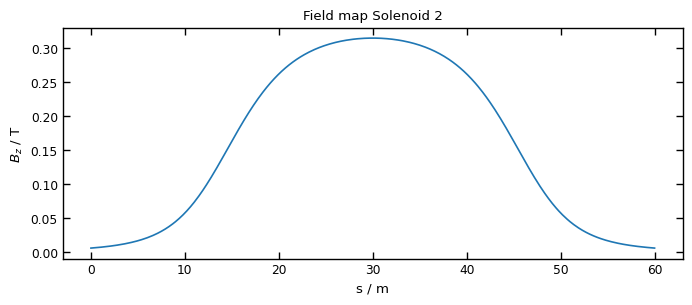

In [39]:
mf_sol2 = pd.read_csv("MedSol-FM-1mm.mf2", sep='\t', header=None, skiprows=1)
mf_sol2.head()
plt.figure(figsize=(8,3))
plt.plot(mf_sol2[mf_sol2[0]==0][1],mf_sol2[mf_sol2[0] == 0][3] * 0.1)
plt.xlabel("s / m")
plt.ylabel(r"$B_z$ / T")
plt.title("Field map Solenoid 2")

Investigate the effect of space-charge for several beam currents (90% space-charge compensation at the start of the LEBT).

In [60]:
110 /145

0.7586206896551724

5.84875152676028e-08
5.84875152676028e-08
5.84875152676028e-08
5.84875152676028e-08
5.84875152676028e-08
5.84875152676028e-08


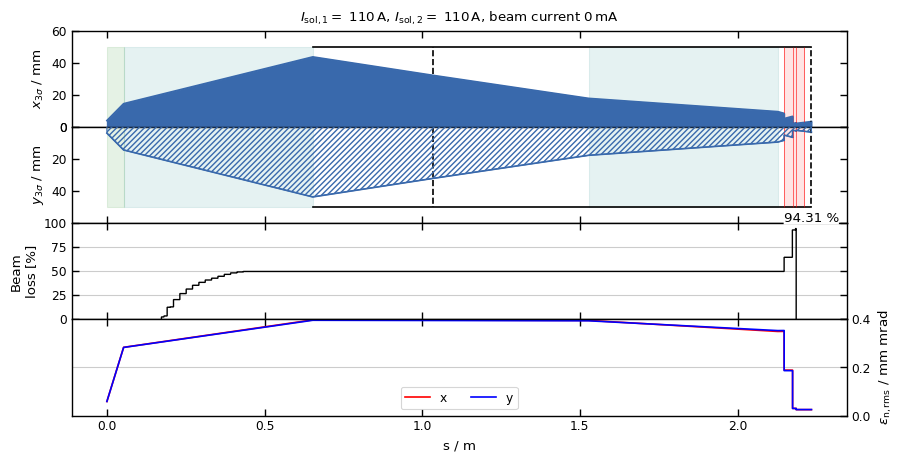

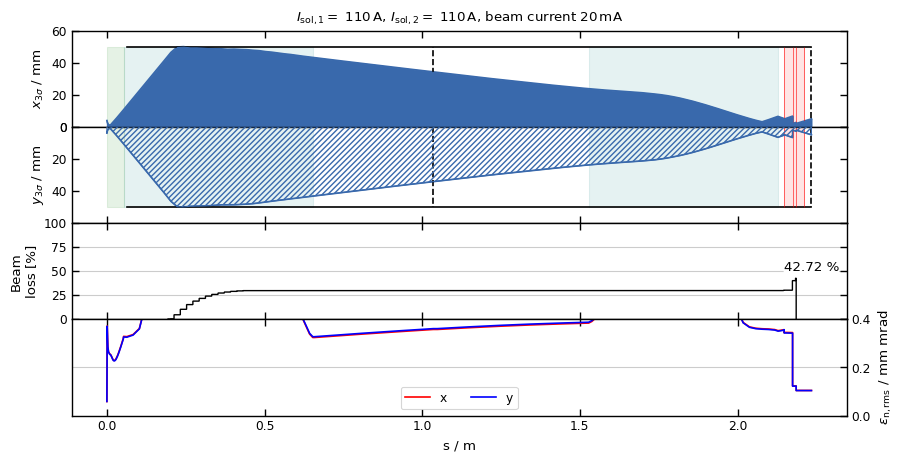

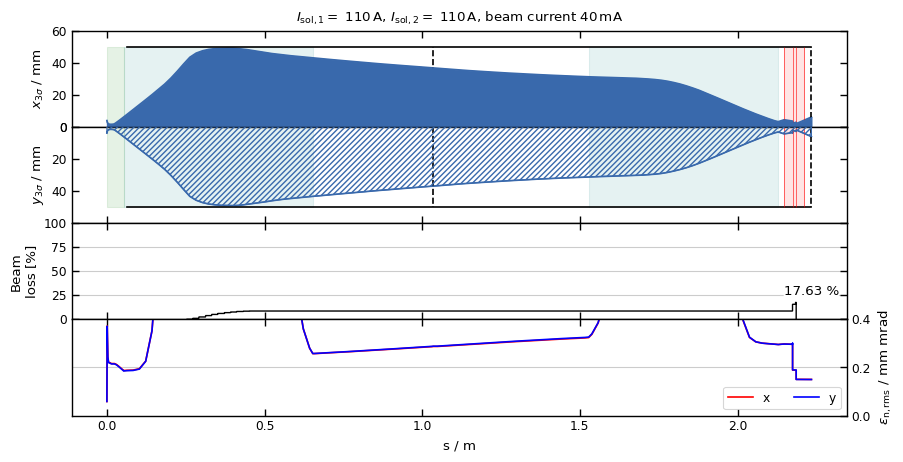

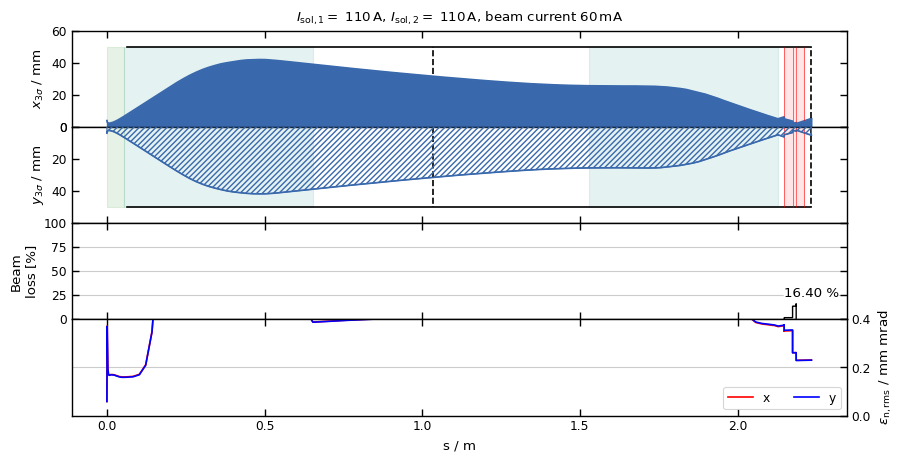

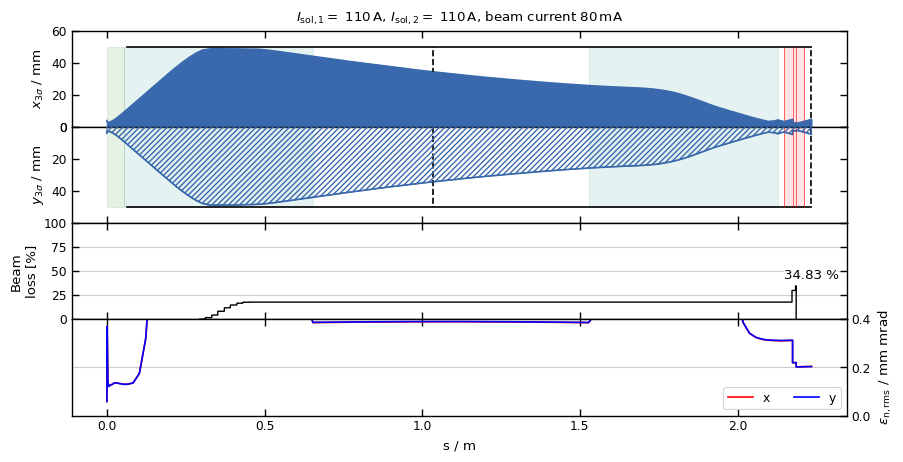

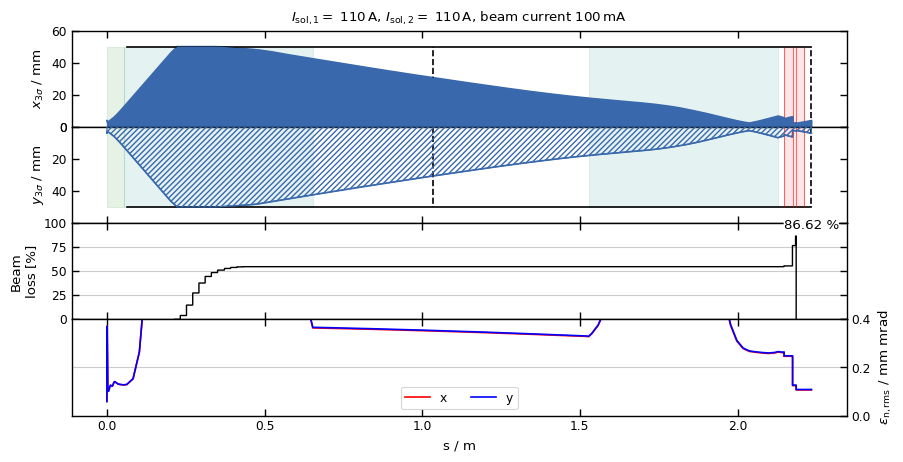

In [31]:
fig2 = plot_beam_size_evolution('AVG19.xls','RMS19.xls', 'DEADRAY19.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A, beam current 0$\,$mA".format(110, 110), 51006)
fig2 = plot_beam_size_evolution('AVG20.xls','RMS20.xls', 'DEADRAY20.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A, beam current 20$\,$mA".format(110, 110), 51006)
fig2 = plot_beam_size_evolution('AVG21.xls','RMS21.xls', 'DEADRAY21.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A, beam current 40$\,$mA".format(110, 110), 51006)
fig2 = plot_beam_size_evolution('AVG22.xls','RMS22.xls', 'DEADRAY22.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A, beam current 60$\,$mA".format(110, 110), 51006)
fig2 = plot_beam_size_evolution('AVG23.xls','RMS23.xls', 'DEADRAY23.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A, beam current 80$\,$mA".format(110, 110), 51006)
fig2 = plot_beam_size_evolution('AVG24.xls','RMS24.xls', 'DEADRAY24.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A, beam current 100$\,$mA".format(110, 110), 51006)

Text(0.5, 1.0, 'Evolution of the beam size in the extraction region for a few beam currents')

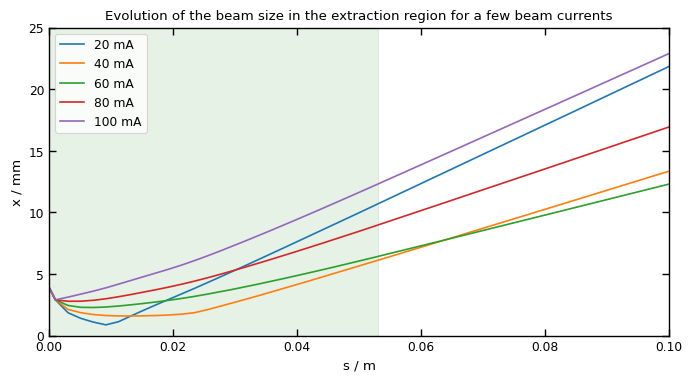

In [85]:
s1, x1, y, ax, ay, eps_x_rms = get_xy_rms_beam_size_plus_aper('RMS19.xls')
s2, x2, y, ax, ay, eps_x_rms = get_xy_rms_beam_size_plus_aper('RMS20.xls')
s3, x3, y, ax, ay, eps_x_rms = get_xy_rms_beam_size_plus_aper('RMS21.xls')
s4, x4, y, ax, ay, eps_x_rms = get_xy_rms_beam_size_plus_aper('RMS22.xls')
s5, x5, y, ax, ay, eps_x_rms = get_xy_rms_beam_size_plus_aper('RMS23.xls')
s6, x6, y, ax, ay, eps_x_rms = get_xy_rms_beam_size_plus_aper('RMS24.xls')
plt.figure(figsize=(8,4))
#plt.plot(s1,x1*1e3, label="0 mA")
plt.plot(s2,x2*1e3, label="20 mA")
plt.plot(s3,x3*1e3, label="40 mA")
plt.plot(s4,x4*1e3, label="60 mA")
plt.plot(s5,x5*1e3, label="80 mA")
plt.plot(s6,x6*1e3, label="100 mA")
plt.xlim([0, 0.1])
plt.ylim([0,25])
plt.fill_betweenx(
    [0, 50],
    0.0,
    0.053,
    color="green",
    alpha=0.1,
)
plt.xlabel("s / m")
plt.ylabel("x / mm")
plt.legend()
plt.title("Evolution of the beam size in the extraction region for a few beam currents")

**Comments:** There is an optimal setup for the solenoid currents that ensures that a fixed beam current is transported within the acceptance of the RFQ box. Higher current/stronger space-charge does not imply faster beam growth within the LEBT. This is because low-current beams are more easily focused within the extraction region and then they diverge quickly, resulting in a larger beam size at the entrance of the 1st solenoid. As a consequence, there is a range of beam currents around 40-60 mA that have a relaively larger waist within the extraction region and therefore the space-charge does not blow-out the beam to the same extent as for those beam-currents lower than this range.

**Note:** Check the legth of the solenoid field map in relation to the actual length and positioning of the solenoid (see eng. drawing below)

<img src="eng-drawing.png" width="1200">

Introduce the second steerer into the beamline and look at its effect below. The kick is applied in x'.

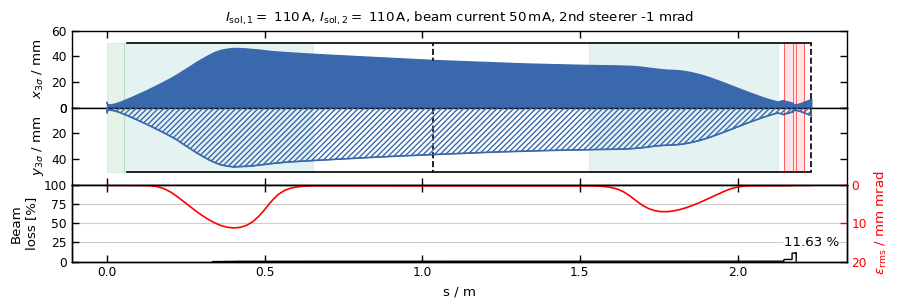

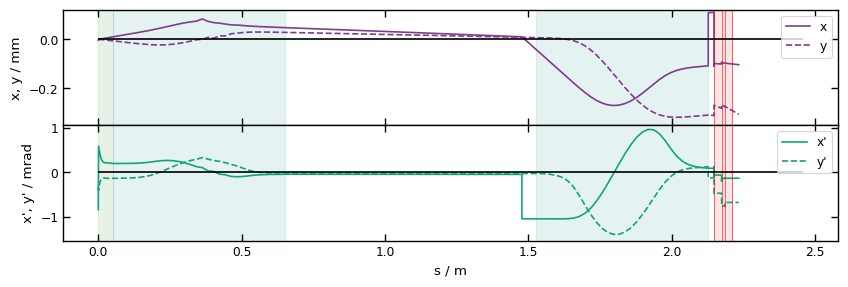

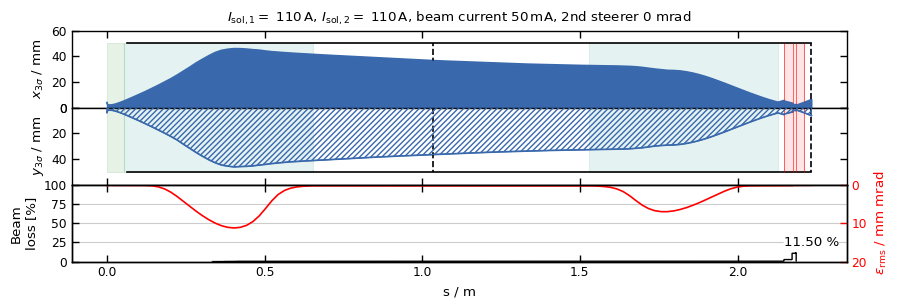

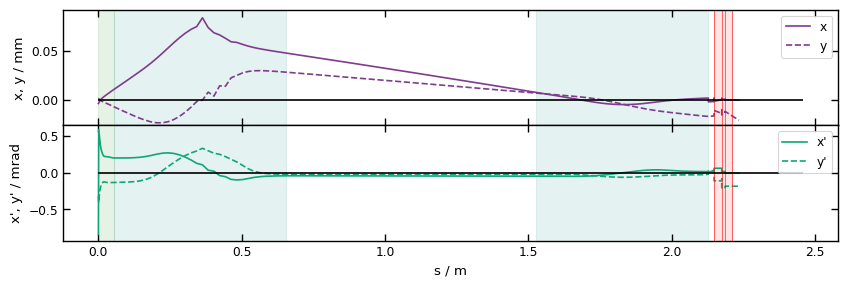

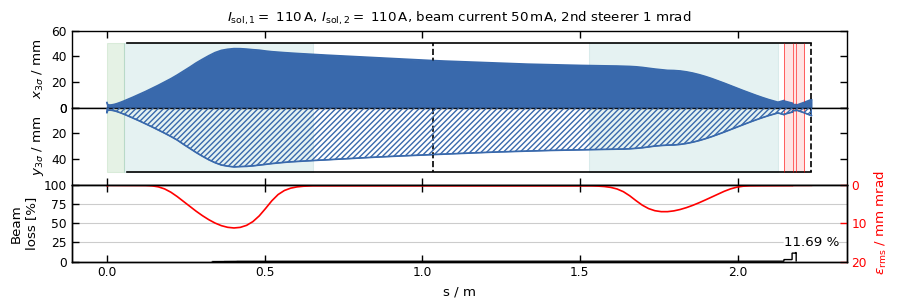

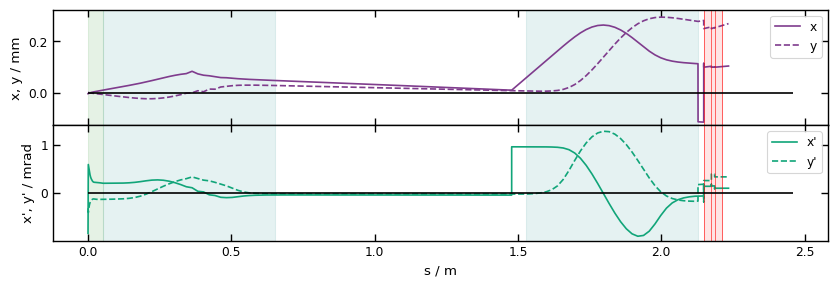

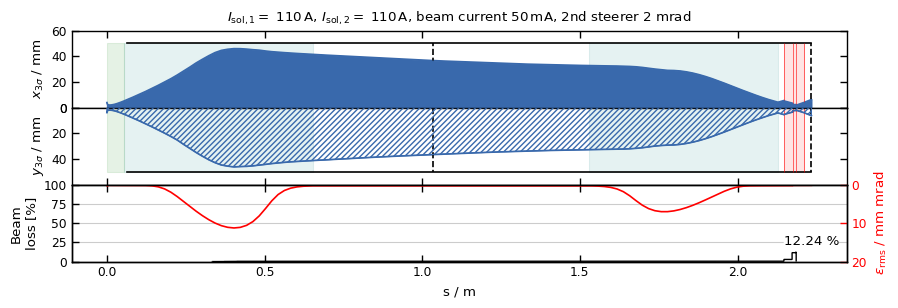

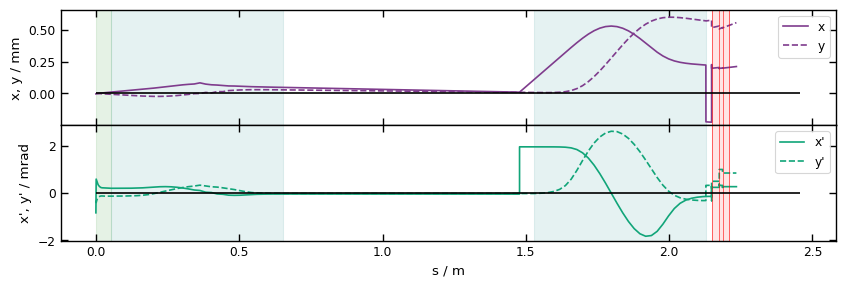

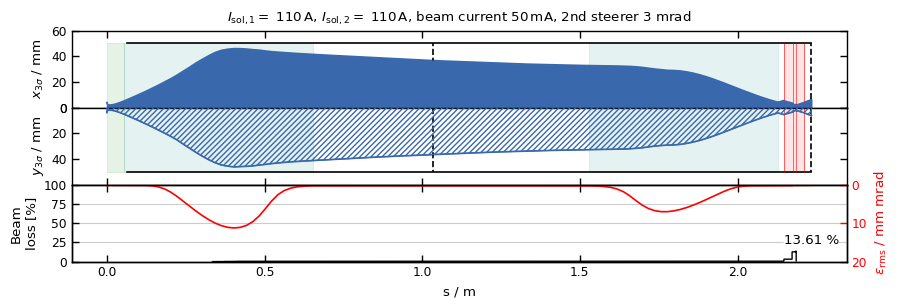

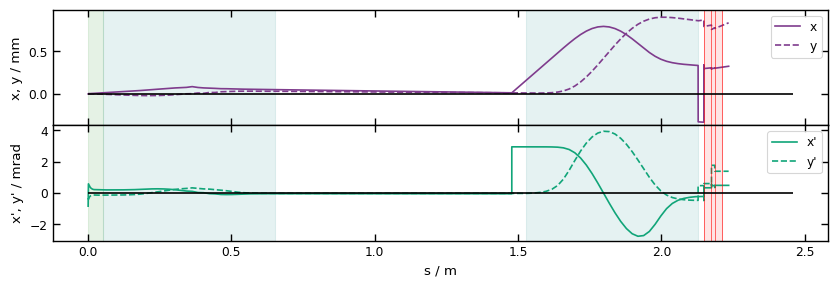

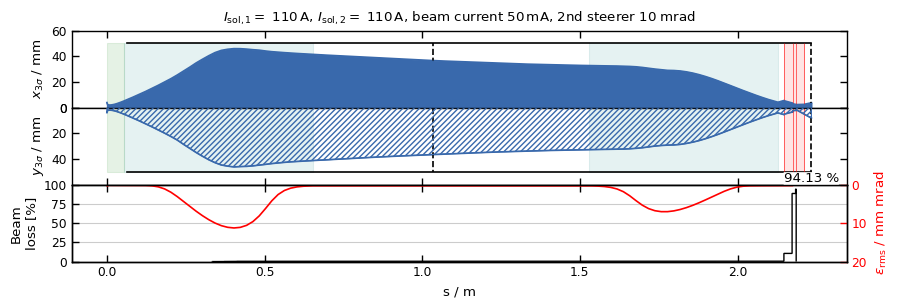

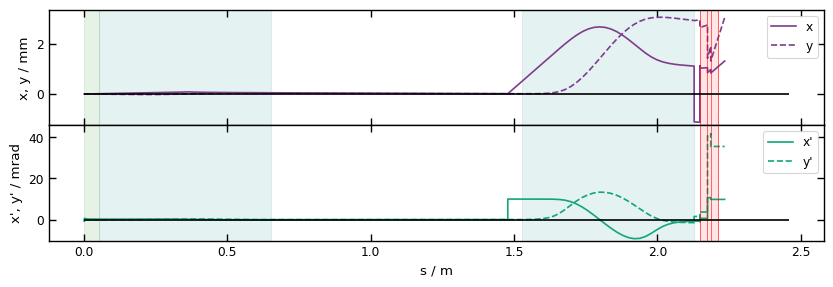

In [103]:
fig2 = plot_beam_size_evolution('RMS30.xls', 'DEADRAY30.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A, beam current 50$\,$mA, 2nd steerer -1 mrad".format(110, 110), 51006)
plot_beam_centre("AVG30.xls")
fig2 = plot_beam_size_evolution('RMS25.xls', 'DEADRAY25.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A, beam current 50$\,$mA, 2nd steerer 0 mrad".format(110, 110), 51006)
plot_beam_centre("AVG25.xls")
fig2 = plot_beam_size_evolution('RMS26.xls', 'DEADRAY26.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A, beam current 50$\,$mA, 2nd steerer 1 mrad".format(110, 110), 51006)
plot_beam_centre("AVG26.xls")
fig2 = plot_beam_size_evolution('RMS27.xls', 'DEADRAY27.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A, beam current 50$\,$mA, 2nd steerer 2 mrad".format(110, 110), 51006)
plot_beam_centre("AVG27.xls")
fig2 = plot_beam_size_evolution('RMS28.xls', 'DEADRAY28.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A, beam current 50$\,$mA, 2nd steerer 3 mrad".format(110, 110), 51006)
plot_beam_centre("AVG28.xls")
fig2 = plot_beam_size_evolution('RMS29.xls', 'DEADRAY29.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A, beam current 50$\,$mA, 2nd steerer 10 mrad".format(110, 110), 51006)
plot_beam_centre("AVG29.xls")

**Comments:** For x' kicks applied by the second steerer of a few mrad, small increases in the beam loss are observed. The position of the first kicker may overlap with the field map of the first solenoid.  

5.84875152676028e-08


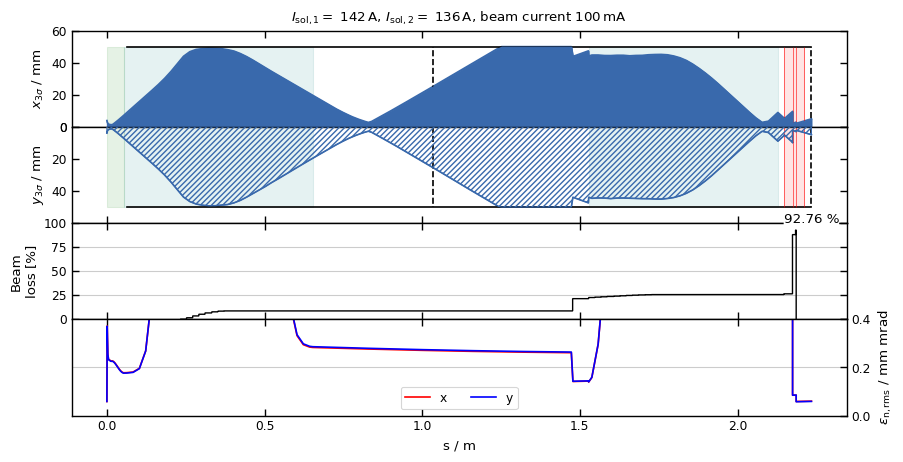

In [92]:
fig2 = plot_beam_size_evolution('AVG31.xls','RMS31.xls', 'DEADRAY31.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A, beam current 100$\,$mA".format(142, 136), 51006)

In [7]:
import matplotlib
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap


def plot_PS(dir, fnames):
    n = len(fnames)
    fig, axs = plt.subplots(2, n, sharex=False, figsize=(4 * n, 8))
    fig.subplots_adjust(wspace=0.3)
    for fname_ix, fname  in enumerate(fnames):
        ps_f = pd.read_csv(dir + fname,sep='\t',skiprows=0,header=0)
        ps_x = ps_f[' x [cm]'].to_numpy() * 10
        ps_xp = ps_f["x' [rad]"].to_numpy() * 1e3
        ps_y = ps_f['y [cm]'].to_numpy() * 10
        ps_yp = ps_f["y' [rad]"].to_numpy() * 1e3

        H, xed, ed = np.histogram2d(ps_x,ps_xp, bins=100)
        norm = np.max(H)


        axs[0][fname_ix].hist2d(ps_x,ps_xp, bins=100, cmap='jet', cmin=1, norm=matplotlib.colors.LogNorm()) #weights=1 / norm * np.ones_like(ps_x))
        axs[1][fname_ix].hexbin(ps_y,ps_yp, bins='log', cmap='jet', mincnt=1)#, cmin=1,norm=matplotlib.colors.LogNorm())
        axs[0][fname_ix].grid(linestyle='--')
        axs[1][fname_ix].grid(linestyle='--')
        axs[0][fname_ix].set_xlabel('x / mm')
        axs[0][fname_ix].set_ylabel("x' / mrad")
        axs[1][fname_ix].set_xlabel('y / mm')
        axs[1][fname_ix].set_ylabel("y' / mrad")
        axs[0][fname_ix].set_title(fname)
        xlim = np.max(ps_x) * 1.5
        xplim = np.max(ps_xp) * 1.5
        axs[0][fname_ix].set_xlim([-xlim, xlim])
        axs[1][fname_ix].set_xlim([-xlim, xlim])
        axs[0][fname_ix].set_ylim([-xplim, xplim])
        axs[1][fname_ix].set_ylim([-xplim, xplim])
        x2 = sstats.moment(ps_x,moment=2)
        xp2 = sstats.moment(ps_xp,moment=2)
        xxp = np.sum(np.multiply(ps_x,ps_xp)) / len(ps_xp)
        emit_rms = np.sqrt(xp2 * x2 - xxp**2)
        alpha = - xxp / emit_rms
        beta =  x2 / emit_rms
        gamma = xp2 / emit_rms
        rms_el_x = matplotlib.patches.Ellipse((0.0,0.0), 2 * np.sqrt(emit_rms * gamma), 2 * np.sqrt(emit_rms * beta),angle=0.5*np.arctan2(-2*alpha, beta - gamma) * 180 / np.pi, facecolor='None', edgecolor='blue')
        #axs[0].add_patch(rms_el_x)
    gamma0 = 1 + 45*1e3 / 938.272e6
    beta0 = np.sqrt(1 - 1 / gamma0**2)
    emit_rms = 2.6  / beta0 / gamma0
    alpha = 0.9159 #0.8864
    beta =  0.0248 #2.355e-2
    gamma = (1 + alpha**2) / beta
    RFQ_rms_el_x = matplotlib.patches.Ellipse((0.0,0.0), 2 * np.sqrt(emit_rms * gamma), 2 * np.sqrt(emit_rms * beta),angle=0.5*np.arctan2(-2*alpha, beta - gamma) * 180 / np.pi, facecolor='None', edgecolor=colors1[8], linewidth=2, label="RFQ zero current acceptance")
    RFQ_rms_el_y = matplotlib.patches.Ellipse((0.0,0.0), 2 * np.sqrt(emit_rms * gamma), 2 * np.sqrt(emit_rms * beta),angle=0.5*np.arctan2(-2*alpha, beta - gamma) * 180 / np.pi, facecolor='None', edgecolor=colors1[8], linewidth=2, label="RFQ zero current acceptance")
    axs[0][n - 1].add_patch(RFQ_rms_el_x)
    axs[0][n - 1].legend()
    axs[1][n - 1].add_patch(RFQ_rms_el_y)
    axs[1][n - 1].legend()

Optics with a parallel beam: 97 A in solenoid 1, 114 A in solenoid 2 [35 mA, 100% SC compensation, source PlasmaOut.dat]

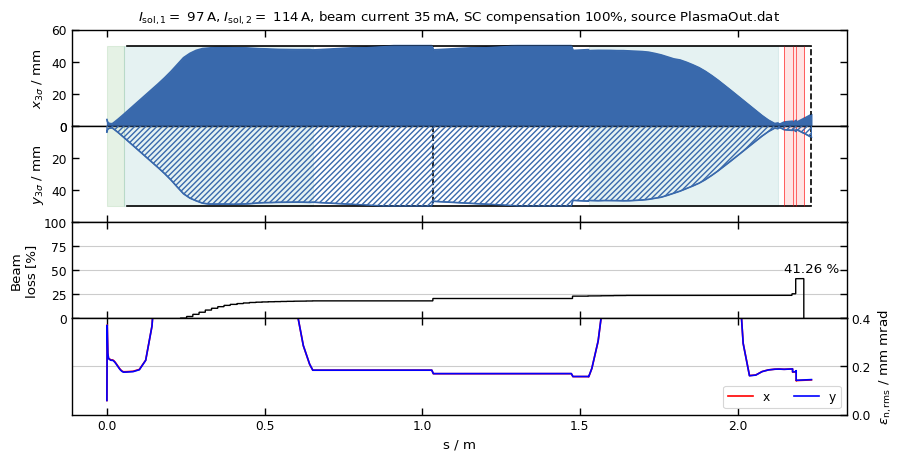

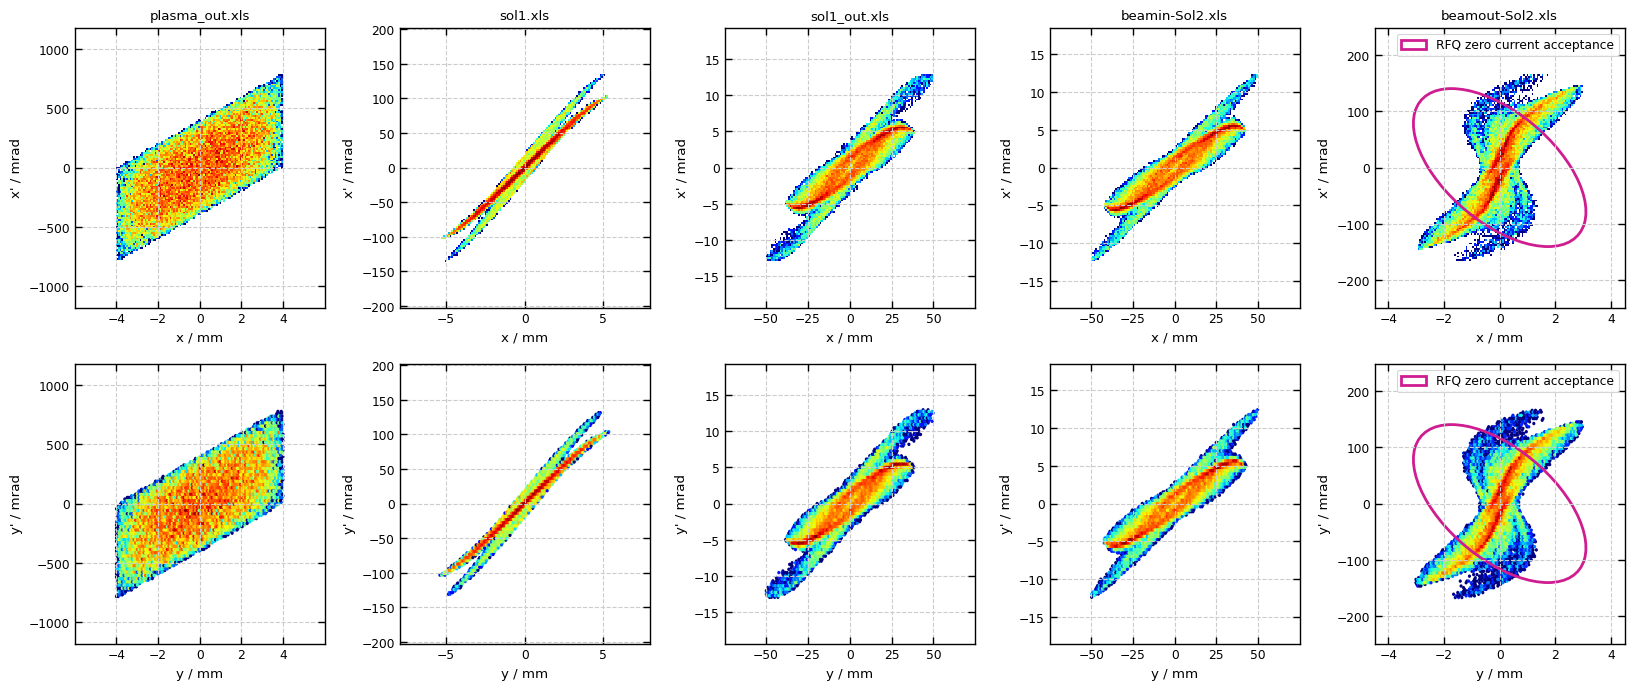

In [374]:
fig2 = plot_beam_size_evolution('AVG32.xls','RMS32.xls', 'DEADRAY32.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A, beam current 35$\,$mA, SC compensation 100%, source PlasmaOut.dat".format(97, 114), 51006)
plot_PS("./PS32/", ["plasma_out.xls", "sol1.xls", "sol1_out.xls", "beamin-Sol2.xls", "beamout-Sol2.xls"])

Optics with a beam waist: 142 A in solenoid 1, 136 A in solenoid 2 [35 mA, 100% SC compensation, source PlasmaOut.dat]

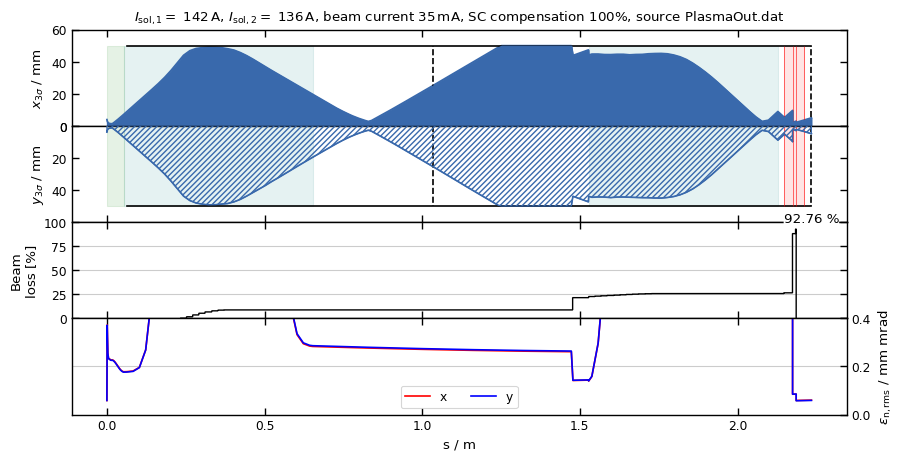

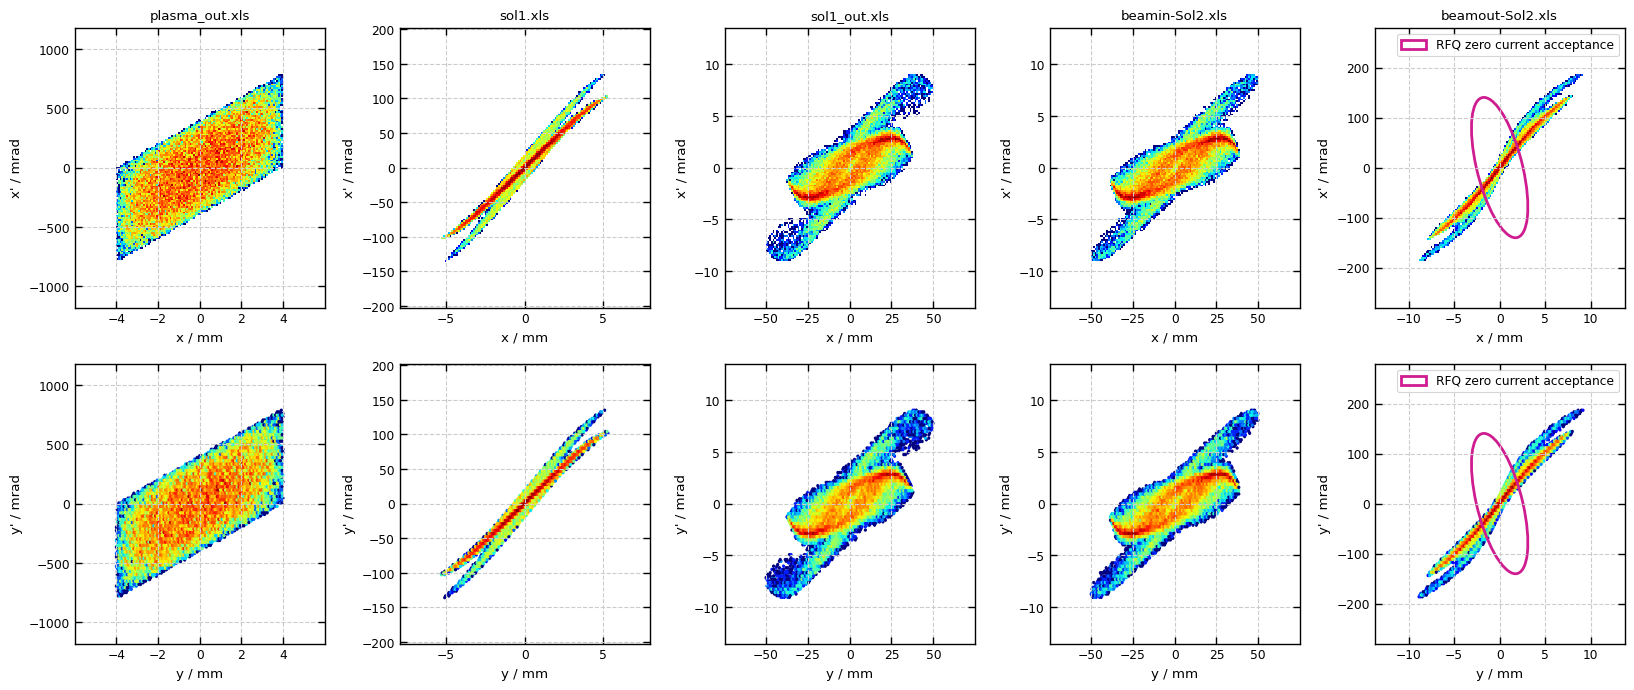

In [353]:
fig2 = plot_beam_size_evolution('AVG33.xls','RMS33.xls', 'DEADRAY33.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A, beam current 35$\,$mA, SC compensation 100%, source PlasmaOut.dat".format(142, 136), 51006)
plot_PS("./PS33/", ["plasma_out.xls", "sol1.xls", "sol1_out.xls", "beamin-Sol2.xls", "beamout-Sol2.xls"])

**Note:** Below is an optimisation of the matching in the LEBT to the RFQ (15 mA available at the time of comissioning)

<img src="LEBT_optim.png" width="800">

Try one of the points above that correspond to low mismatch factor.

In [289]:
print(87/142,116/136)

0.6126760563380281 0.8529411764705882


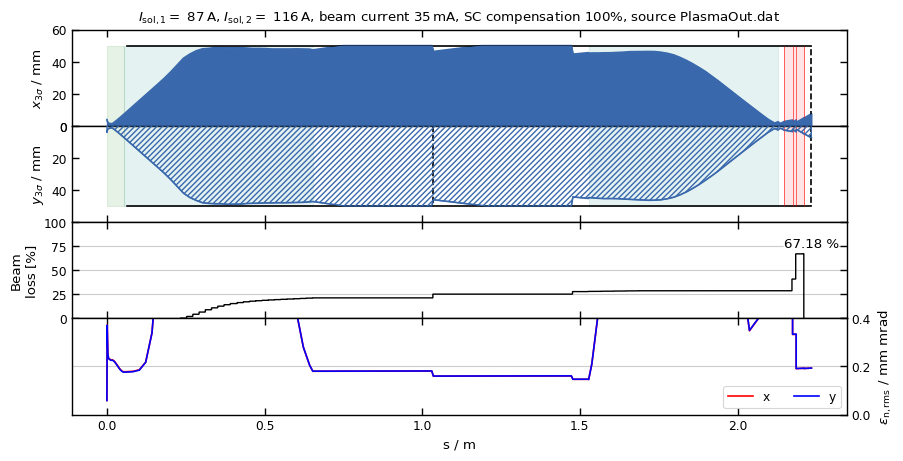

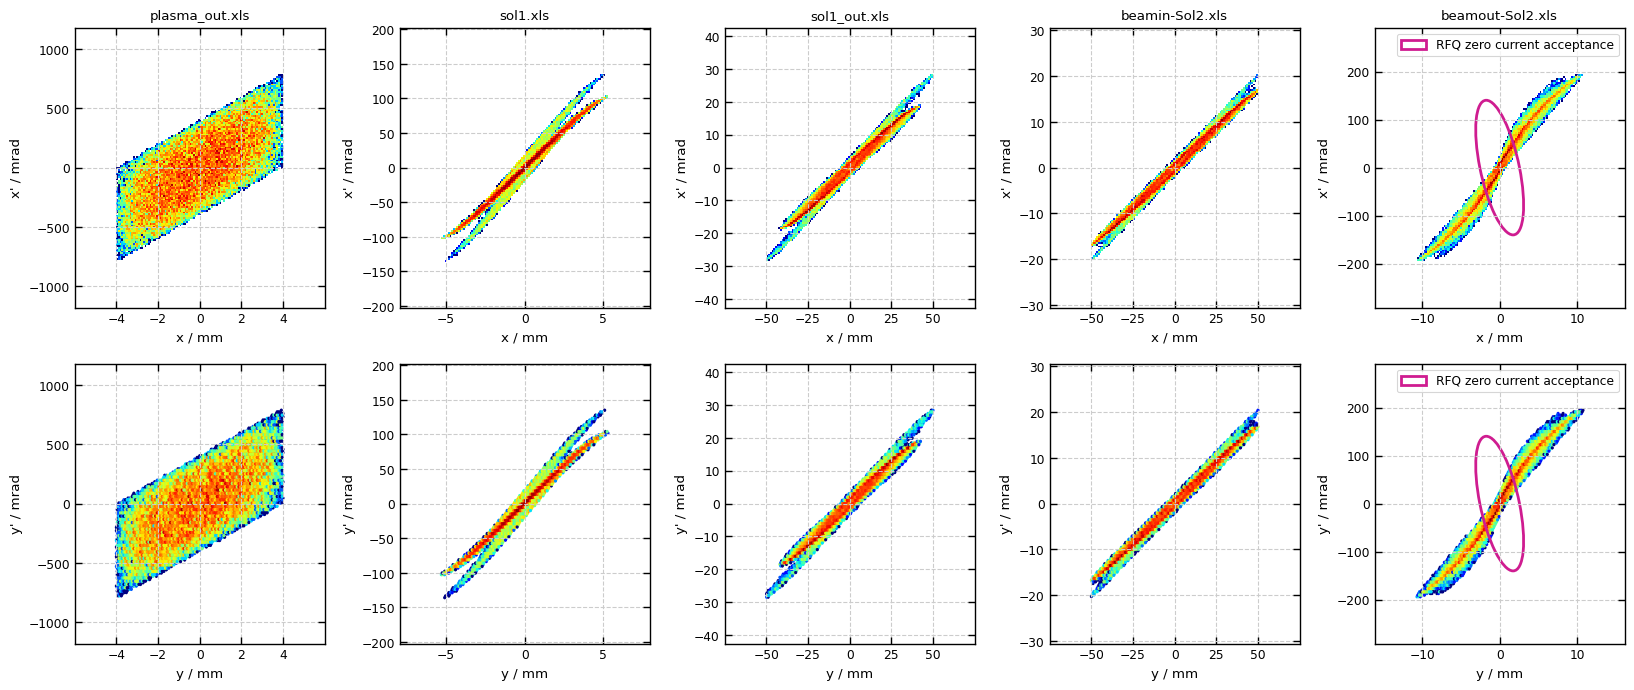

In [354]:
fig2 = plot_beam_size_evolution('AVG34.xls','RMS34.xls', 'DEADRAY34.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A, beam current 35$\,$mA, SC compensation 100%, source PlasmaOut.dat".format(87, 116), 51006)
plot_PS("./PS34/", ["plasma_out.xls", "sol1.xls", "sol1_out.xls", "beamin-Sol2.xls", "beamout-Sol2.xls"])

In [355]:
110 /145

0.7586206896551724

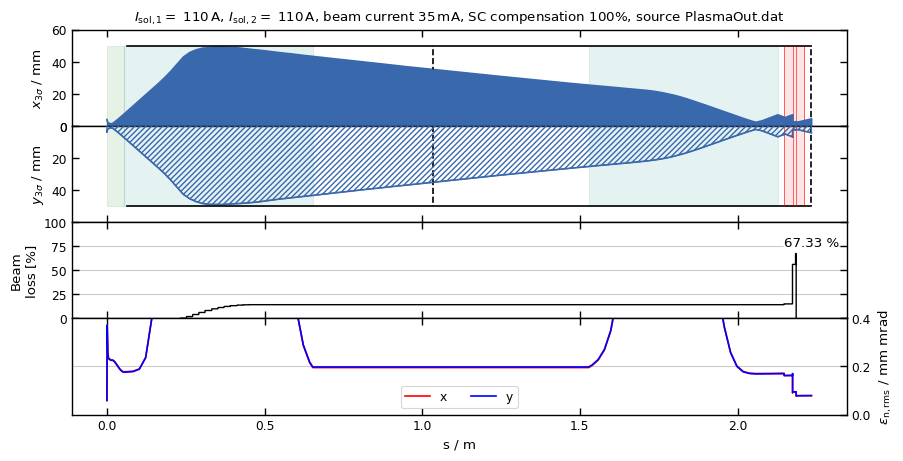

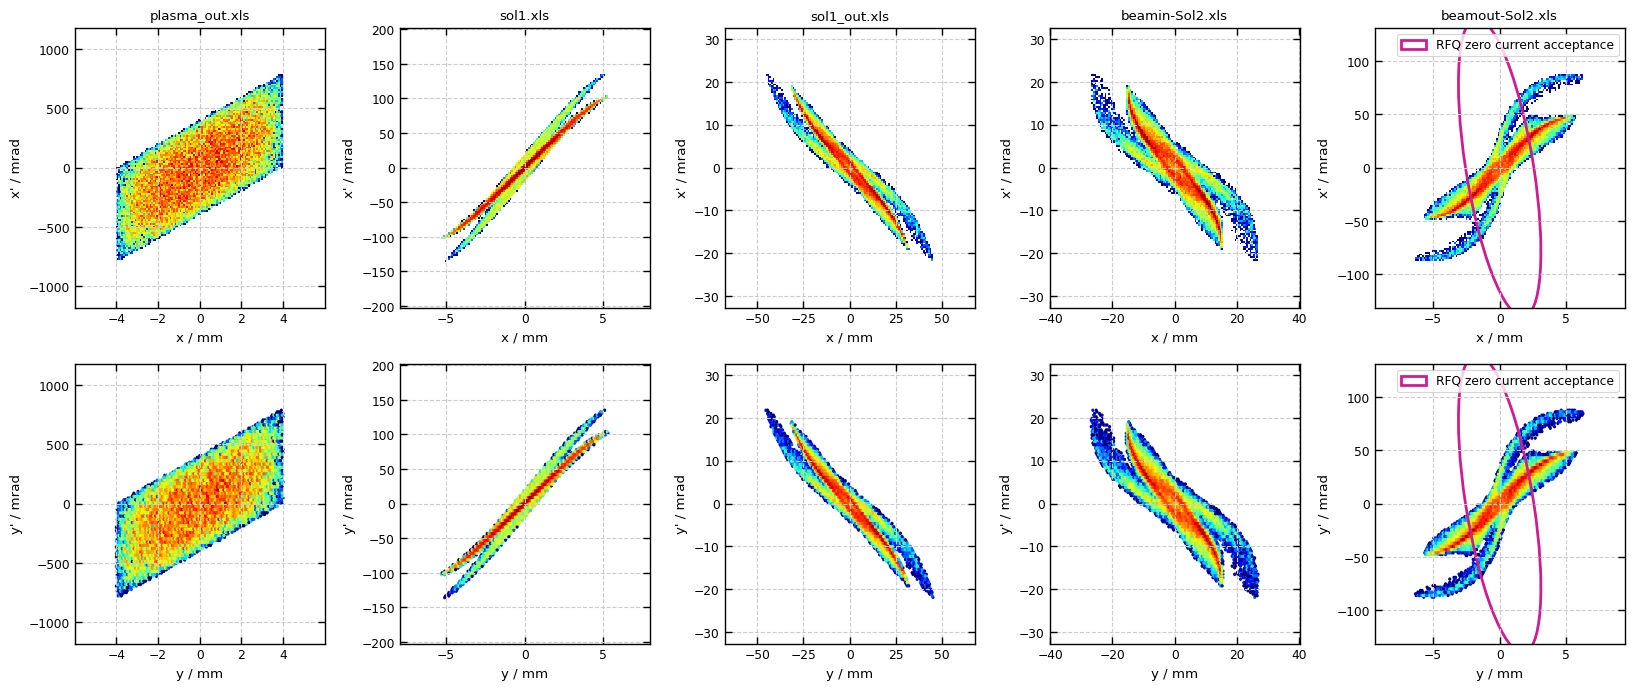

In [356]:
fig2 = plot_beam_size_evolution('AVG35.xls','RMS35.xls', 'DEADRAY35.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A, beam current 35$\,$mA, SC compensation 100%, source PlasmaOut.dat".format(110, 110), 51006)
plot_PS("./PS35/", ["plasma_out.xls", "sol1.xls", "sol1_out.xls", "beamin-Sol2.xls", "beamout-Sol2.xls"])

In [295]:
70/145

0.4827586206896552

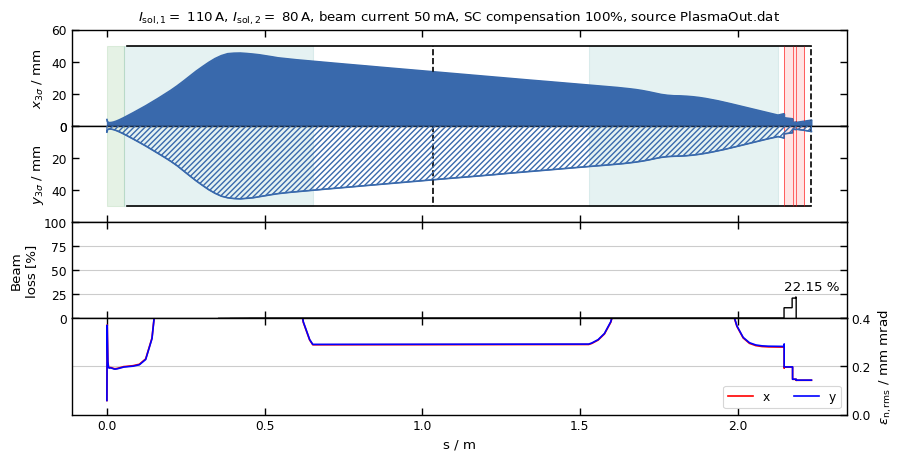

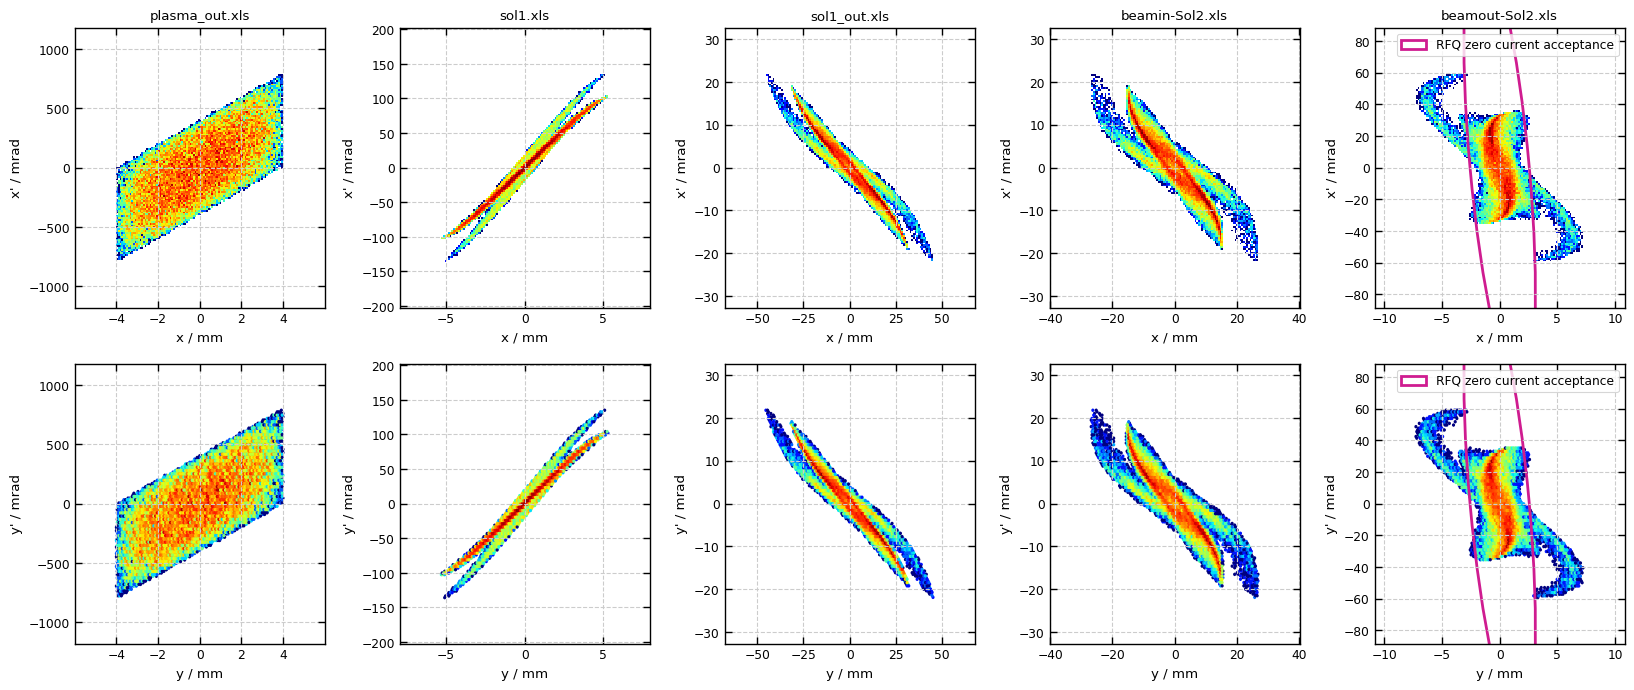

In [357]:
fig2 = plot_beam_size_evolution('AVG37.xls','RMS37.xls', 'DEADRAY37.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A, beam current 50$\,$mA, SC compensation 100%, source PlasmaOut.dat".format(110, 80), 51006)
plot_PS("./PS37/", ["plasma_out.xls", "sol1.xls", "sol1_out.xls", "beamin-Sol2.xls", "beamout-Sol2.xls"])

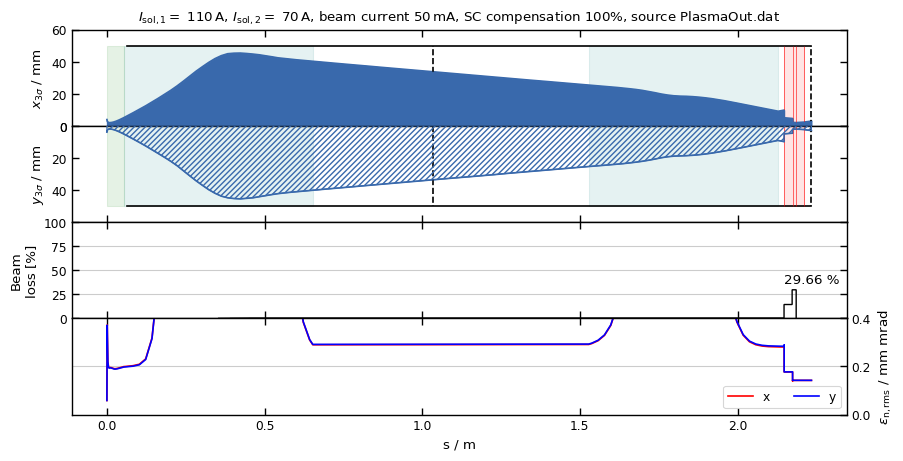

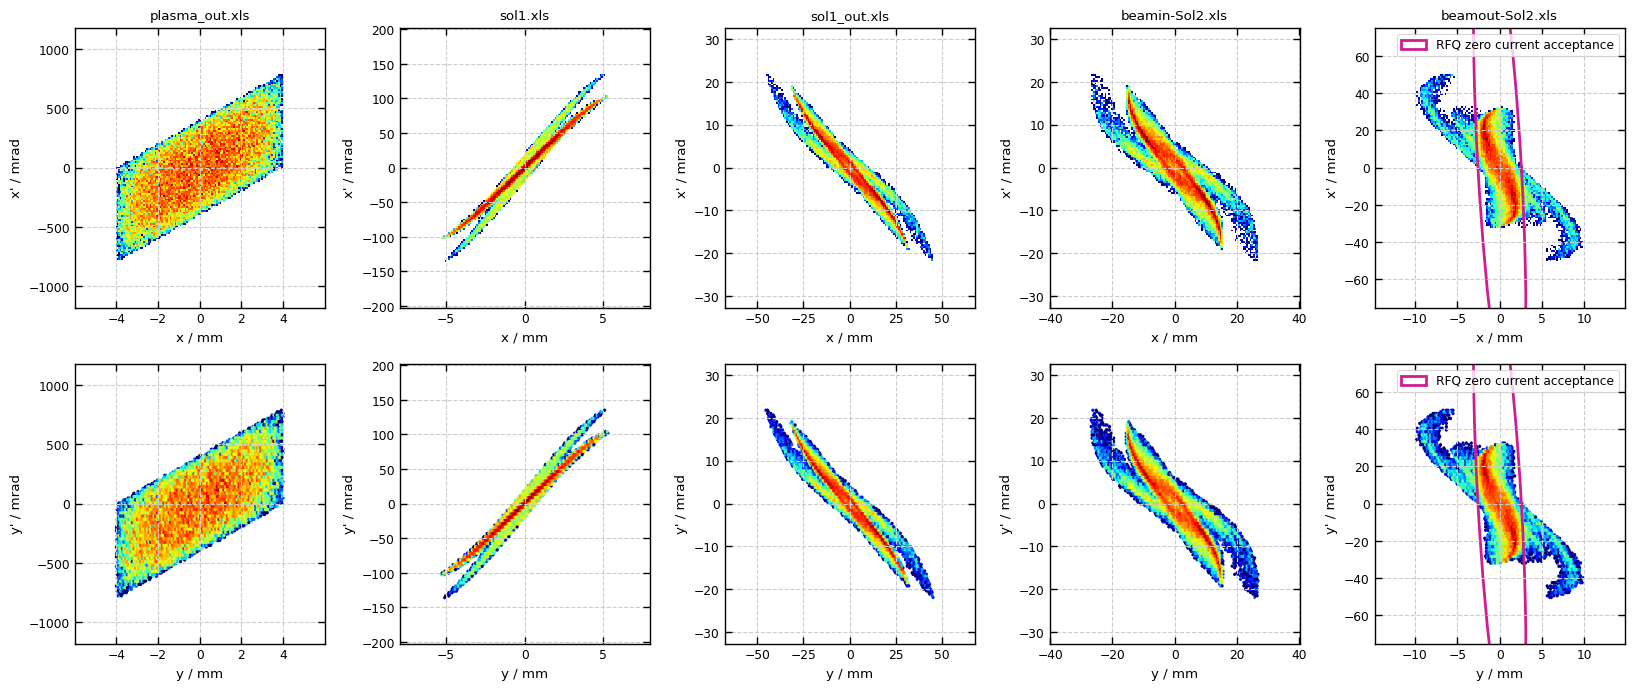

In [358]:
fig2 = plot_beam_size_evolution('AVG38.xls','RMS38.xls', 'DEADRAY38.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A, beam current 50$\,$mA, SC compensation 100%, source PlasmaOut.dat".format(110, 70), 51006)
plot_PS("./PS38/", ["plasma_out.xls", "sol1.xls", "sol1_out.xls", "beamin-Sol2.xls", "beamout-Sol2.xls"])

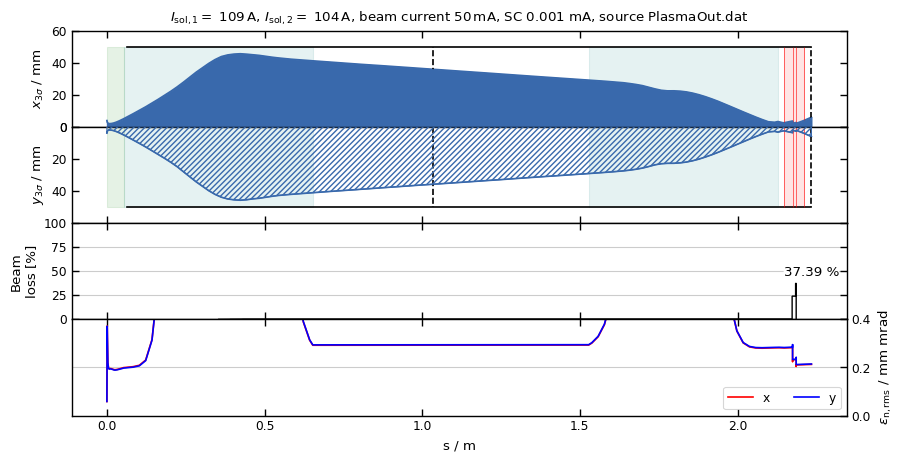

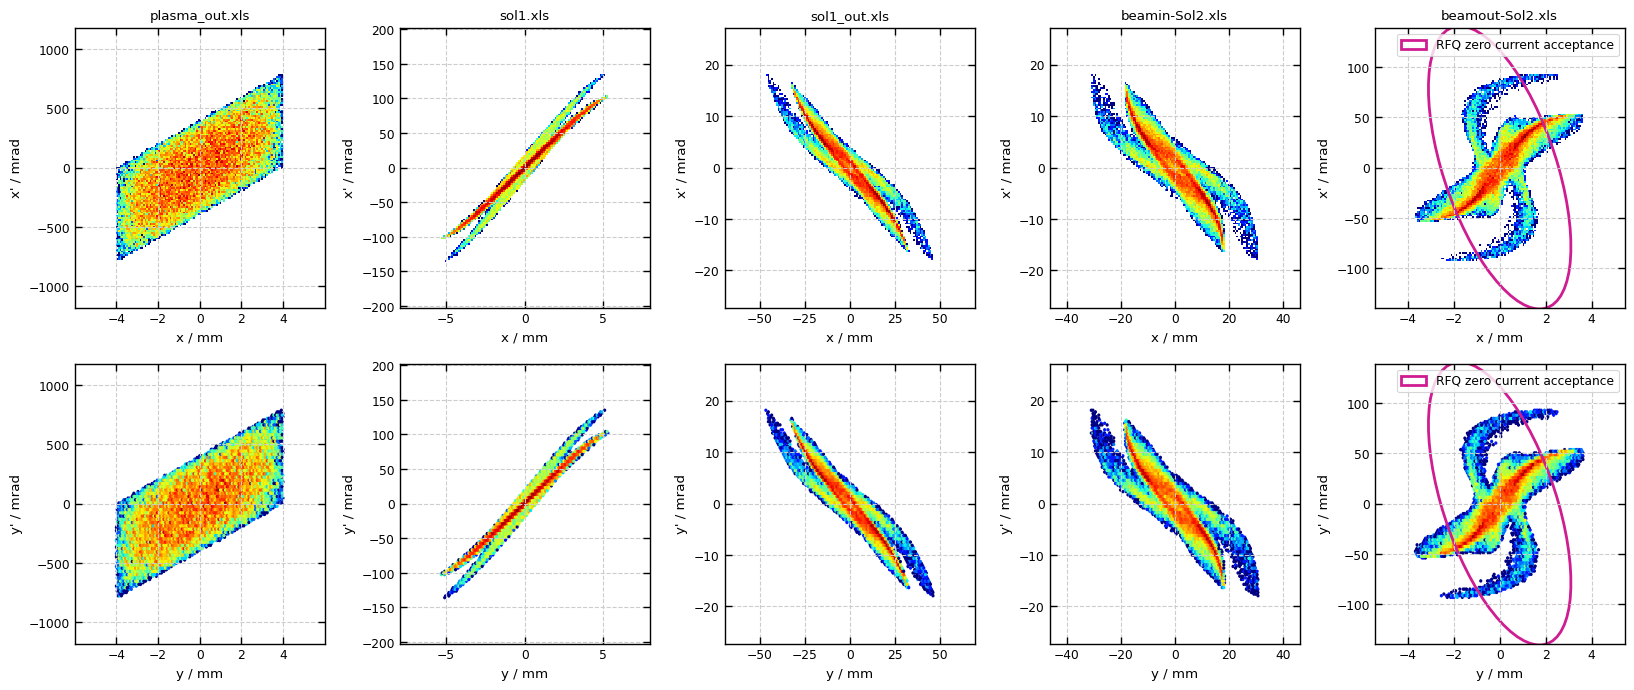

In [359]:
fig2 = plot_beam_size_evolution('AVG39.xls','RMS39.xls', 'DEADRAY39.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A, beam current 50$\,$mA, SC 0.001 mA, source PlasmaOut.dat".format(108.58, 103.66), 51006)
plot_PS("./PS39/", ["plasma_out.xls", "sol1.xls", "sol1_out.xls", "beamin-Sol2.xls", "beamout-Sol2.xls"])

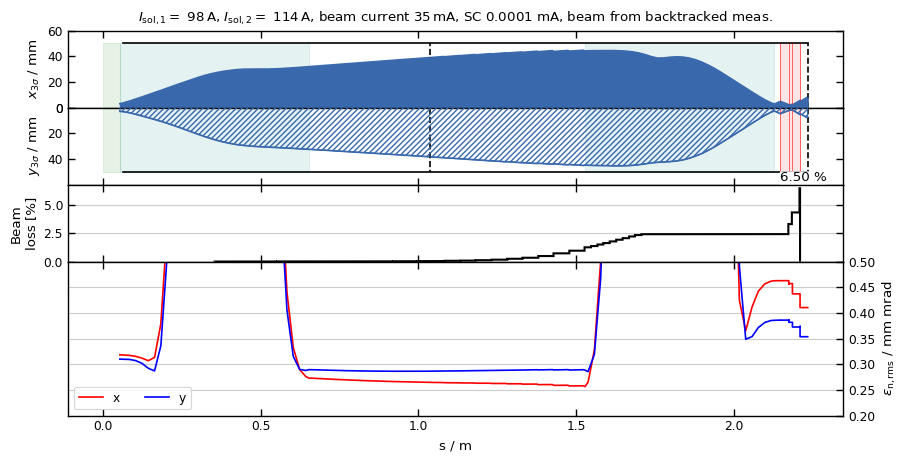

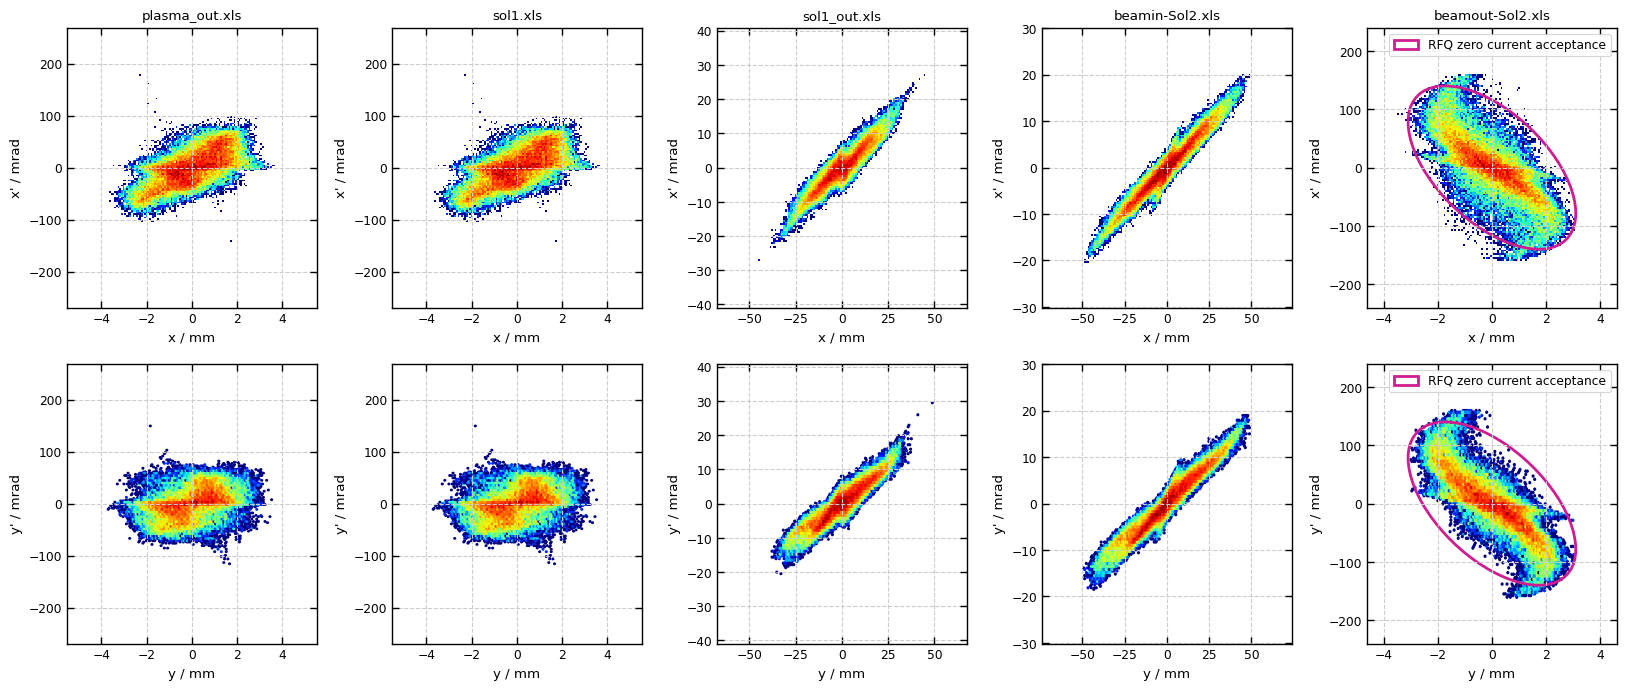

In [69]:
fig2 = plot_beam_size_evolution('AVG41.xls','RMS41.xls', 'DEADRAY41.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A, beam current 35$\,$mA, SC 0.0001 mA, beam from backtracked meas.".format(98.39, 113.65), 48157, [0.2, 0.5])
plot_PS("./PS41/", ["plasma_out.xls", "sol1.xls", "sol1_out.xls", "beamin-Sol2.xls", "beamout-Sol2.xls"])

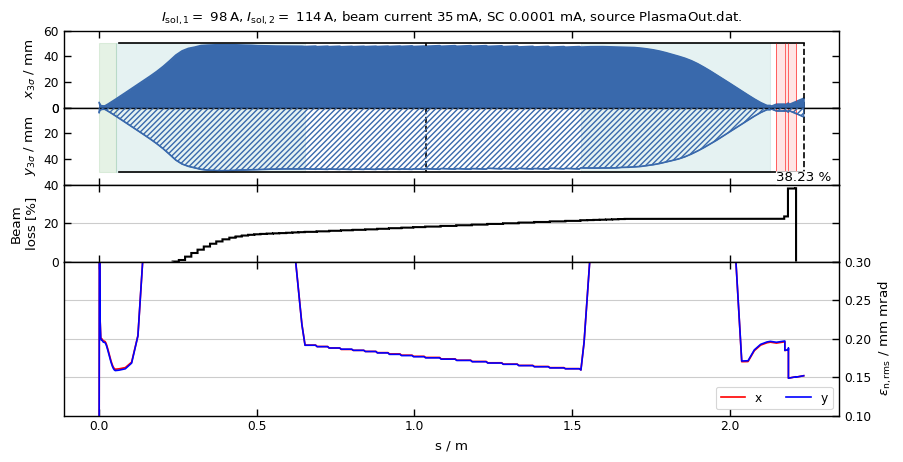

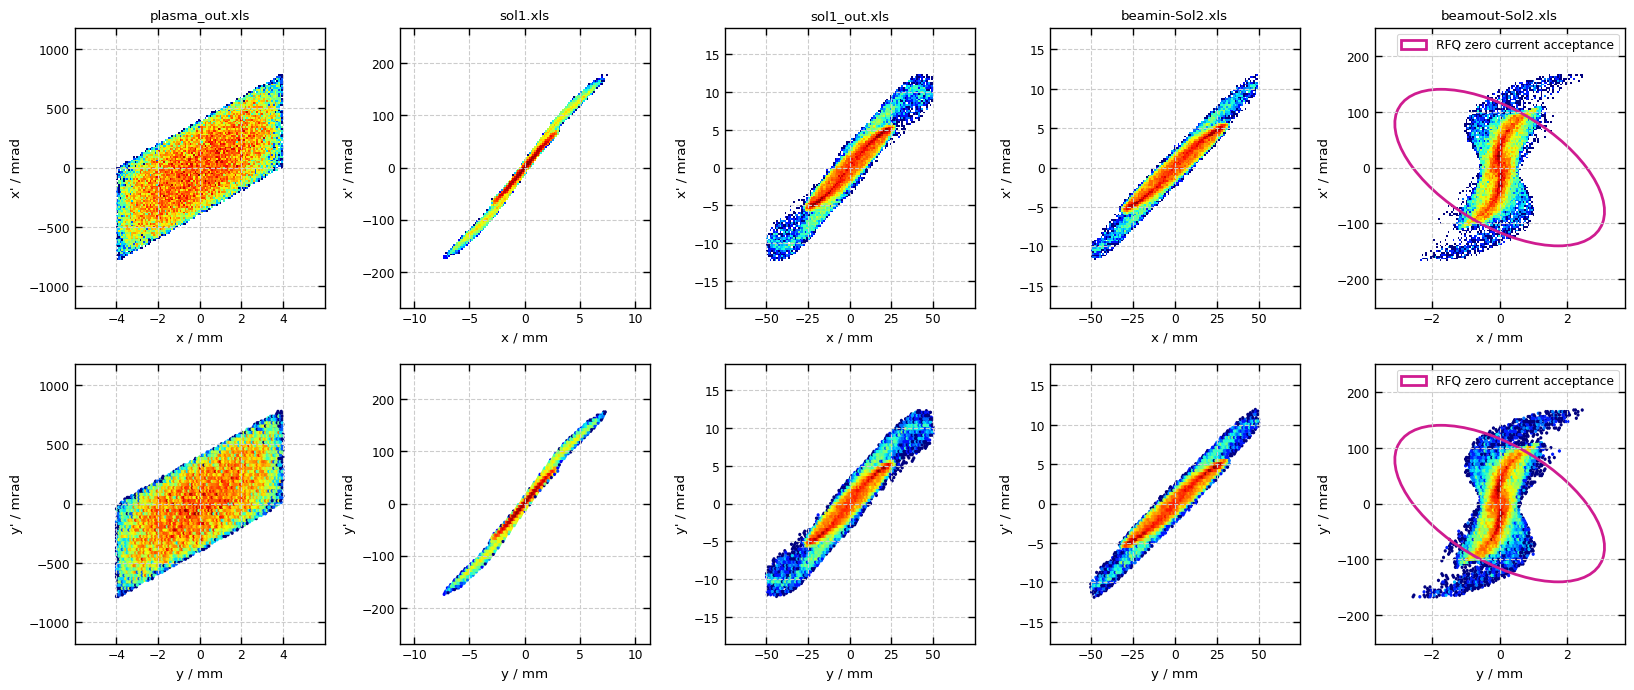

In [73]:
fig2 = plot_beam_size_evolution('AVG42.xls','RMS42.xls', 'DEADRAY42.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A, beam current 35$\,$mA, SC 0.0001 mA, source PlasmaOut.dat.".format(98.39, 113.65), 51006, [0.1, 0.3])
plot_PS("./PS42/", ["plasma_out.xls", "sol1.xls", "sol1_out.xls", "beamin-Sol2.xls", "beamout-Sol2.xls"])

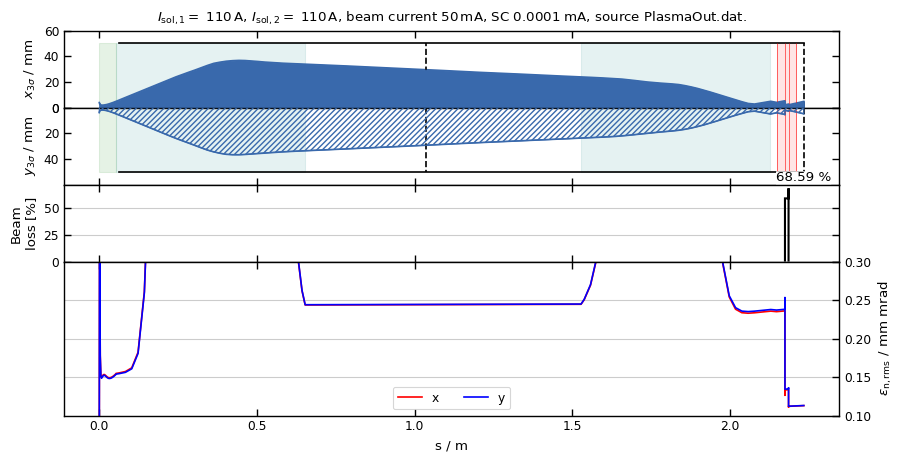

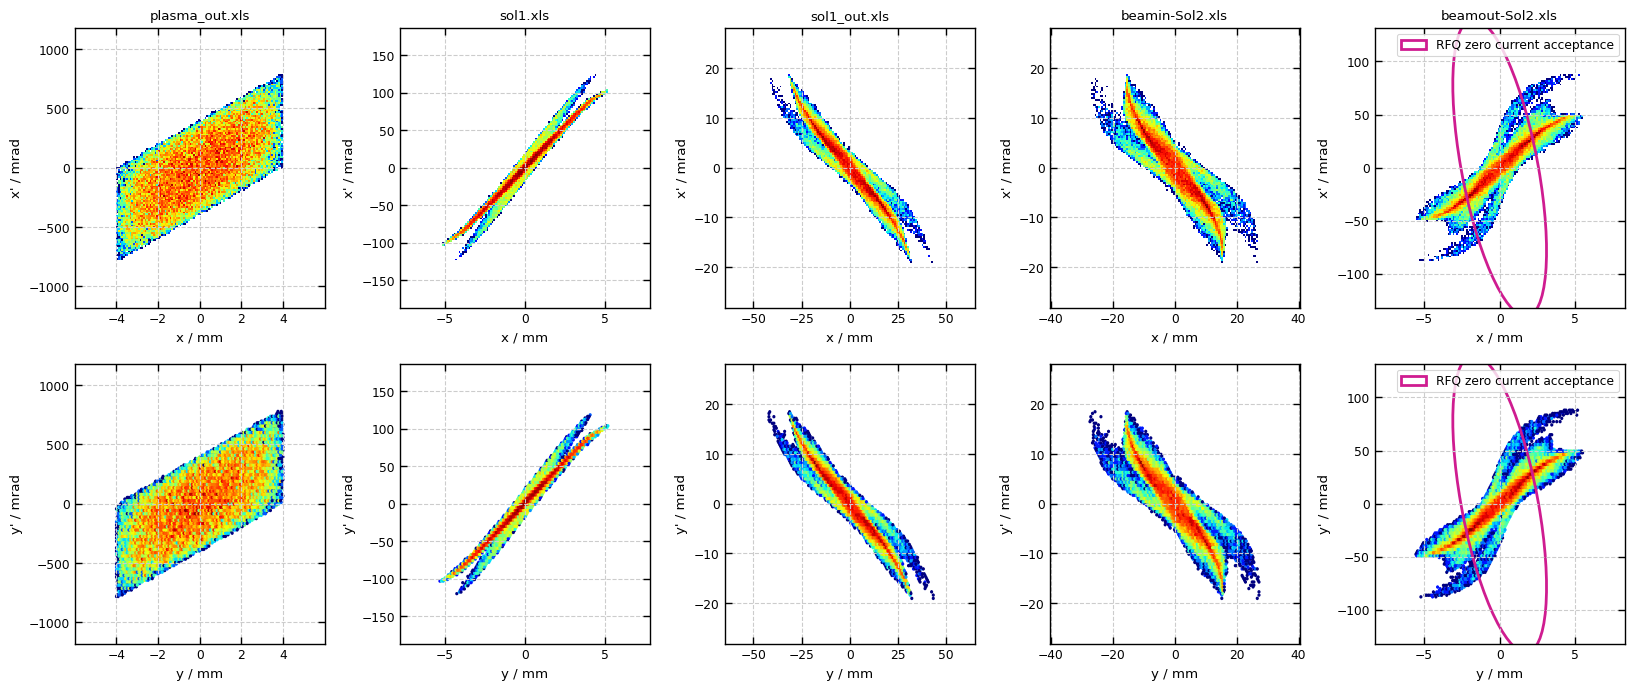

In [75]:
fig2 = plot_beam_size_evolution('AVG43.xls','RMS43.xls', 'DEADRAY43.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A, beam current 50$\,$mA, SC 0.0001 mA, source PlasmaOut.dat.".format(110, 110), 51006, [0.1, 0.3])
plot_PS("./PS43/", ["plasma_out.xls", "sol1.xls", "sol1_out.xls", "beamin-Sol2.xls", "beamout-Sol2.xls"])

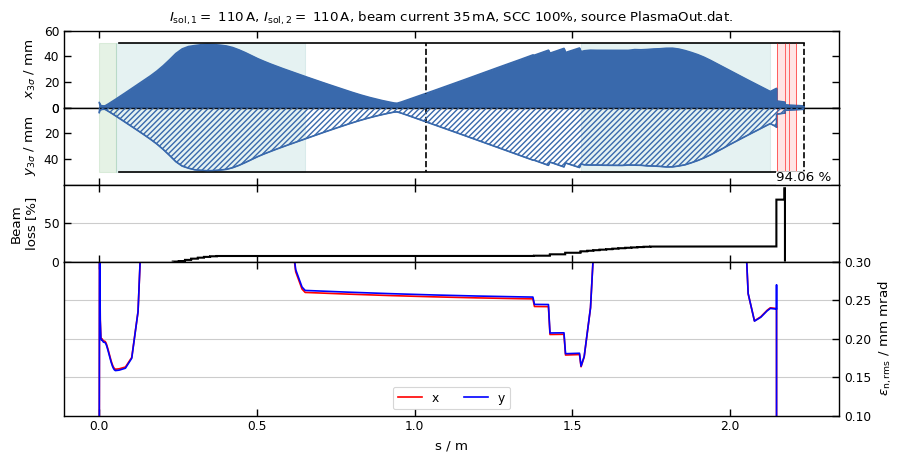

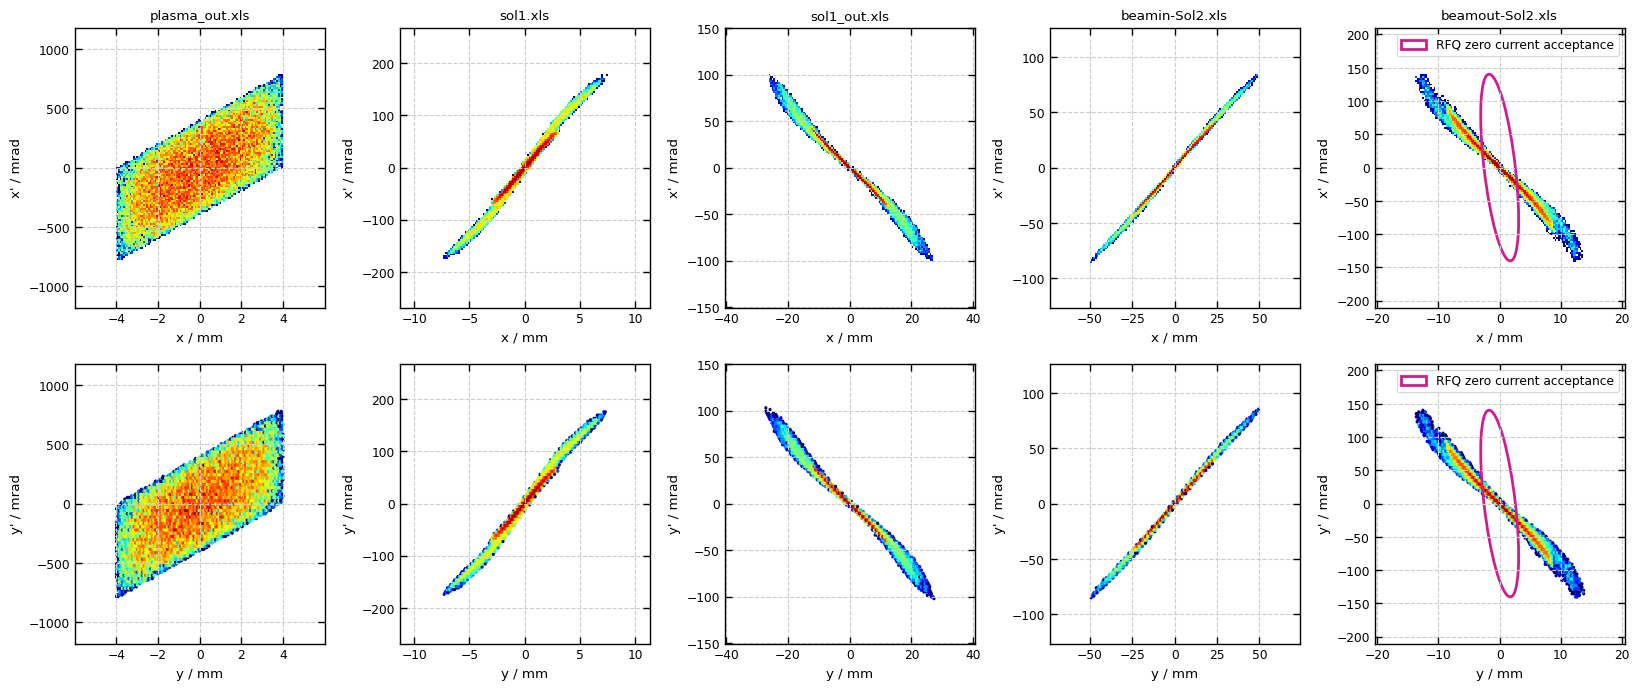

In [94]:
fig2 = plot_beam_size_evolution('AVG44.xls','RMS44.xls', 'DEADRAY44.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.0f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.0f}$\,$A, beam current 35$\,$mA, SCC 100%, source PlasmaOut.dat.".format(110, 110), 51006, [0.1, 0.3])
plot_PS("./", ["plasma_out.xls", "sol1.xls", "sol1_out.xls", "beamin-Sol2.xls", "beamout-Sol2.xls"])

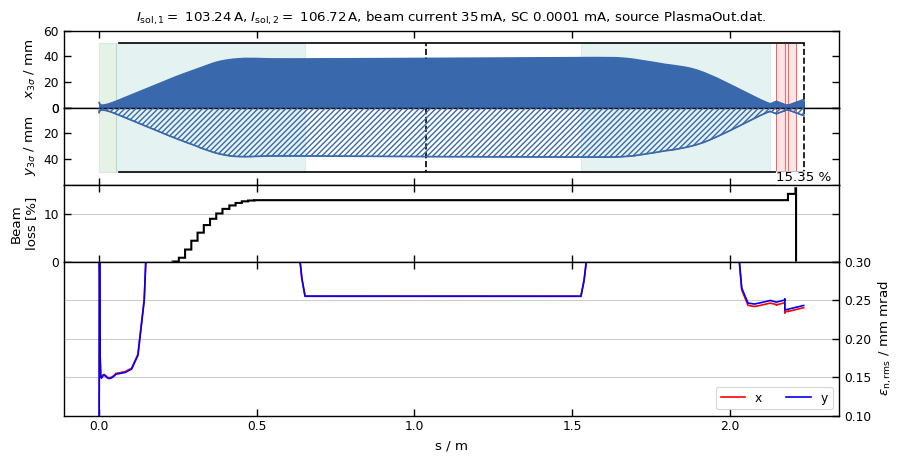

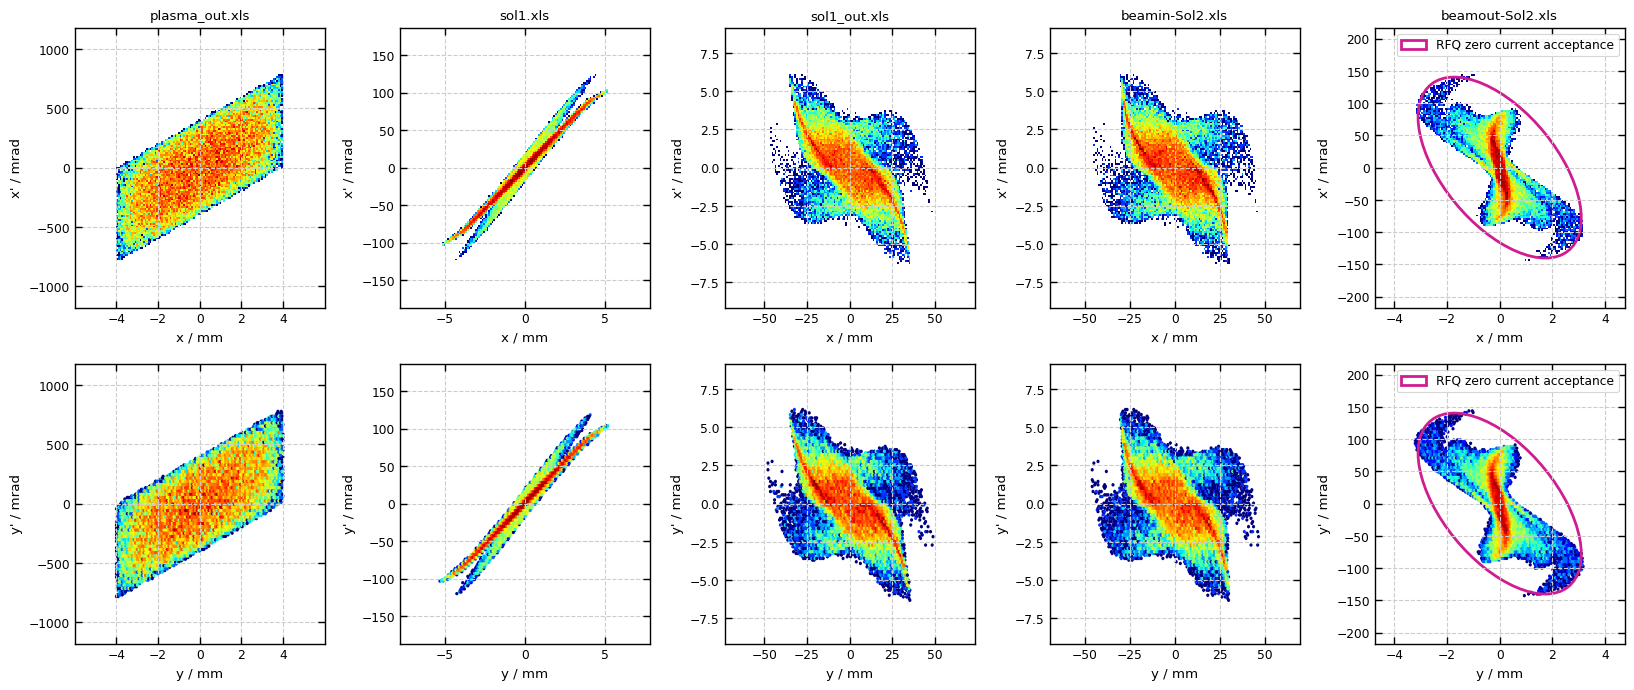

In [102]:
fig2 = plot_beam_size_evolution('AVG45.xls','RMS45.xls', 'DEADRAY45.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.2f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.2f}$\,$A, beam current 50$\,$mA, SC 0.0001 mA, source PlasmaOut.dat.".format(103.24, 106.72), 51006, [0.1, 0.3])
plot_PS("./PS45/", ["plasma_out.xls", "sol1.xls", "sol1_out.xls", "beamin-Sol2.xls", "beamout-Sol2.xls"])

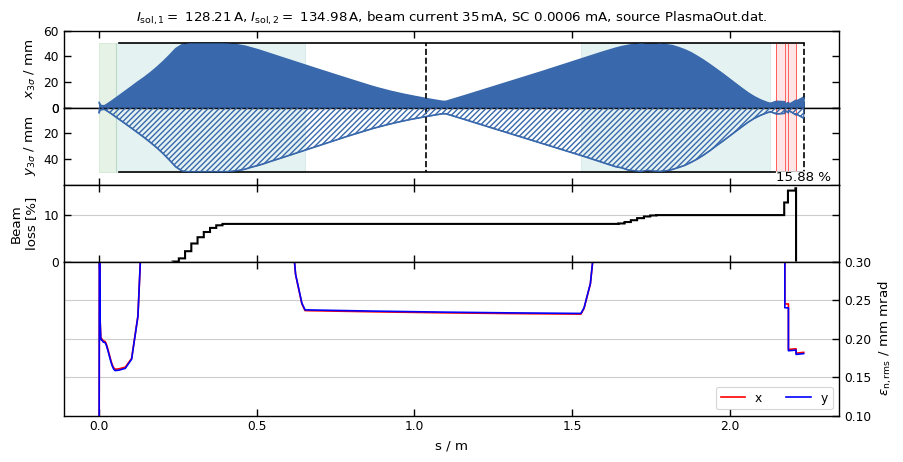

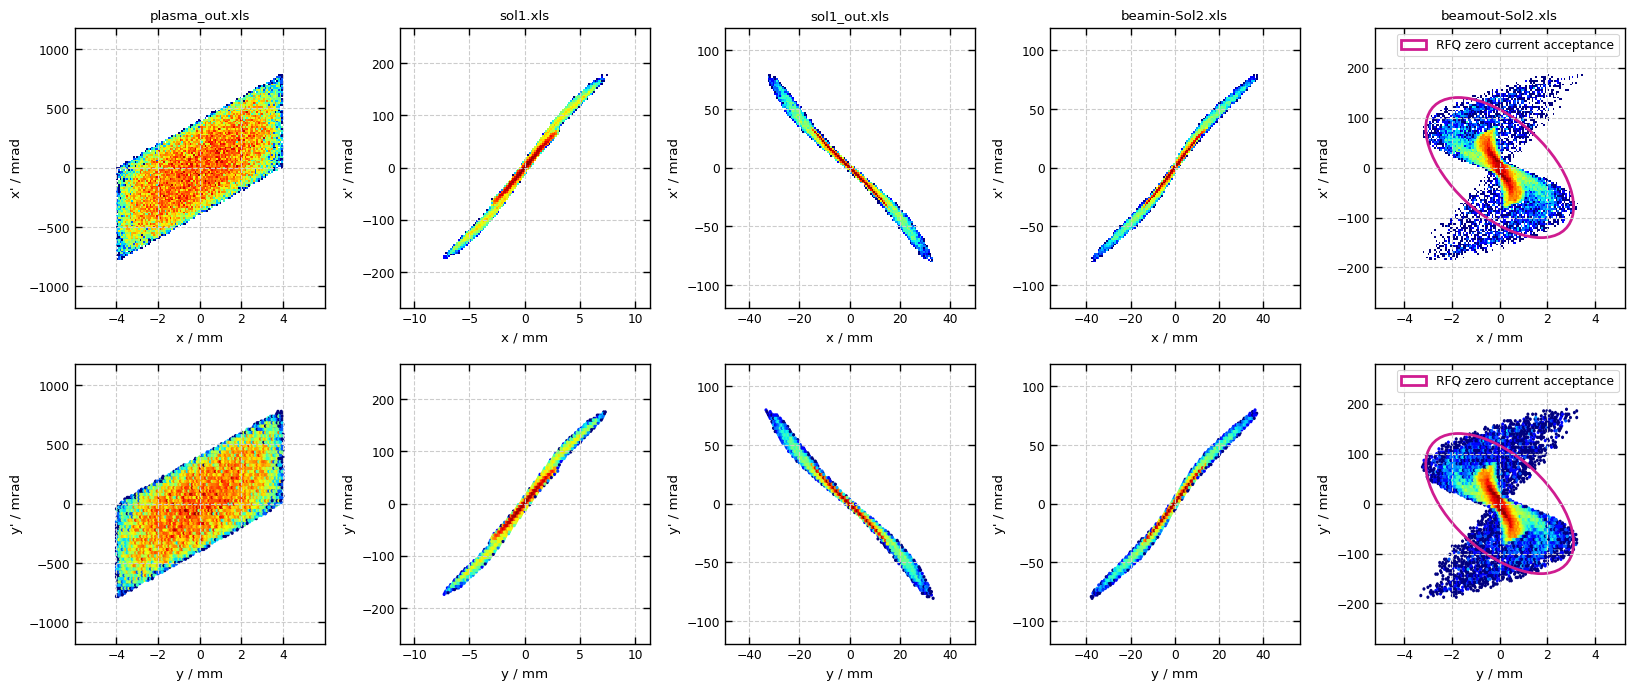

In [132]:
fig2 = plot_beam_size_evolution('AVG46.xls','RMS46.xls', 'DEADRAY46.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.2f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.2f}$\,$A, beam current 35$\,$mA, SC 0.0006 mA, source PlasmaOut.dat.".format(128.21031972, 134.98), 51006, [0.1, 0.3])
plot_PS("./PS46/", ["plasma_out.xls", "sol1.xls", "sol1_out.xls", "beamin-Sol2.xls", "beamout-Sol2.xls"])

In [128]:
np.array( [108.54108366 , 97.88789078]) / 145

array([0.7485592, 0.6750889])

In [121]:
100 - 84.96

15.040000000000006

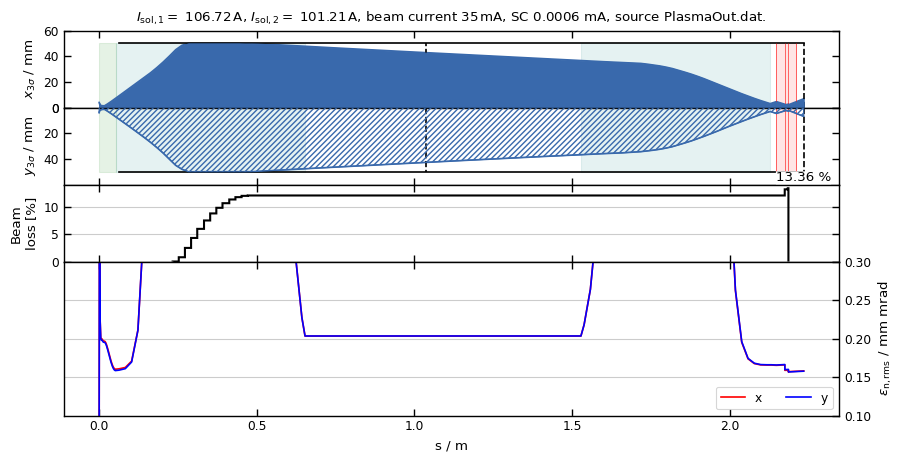

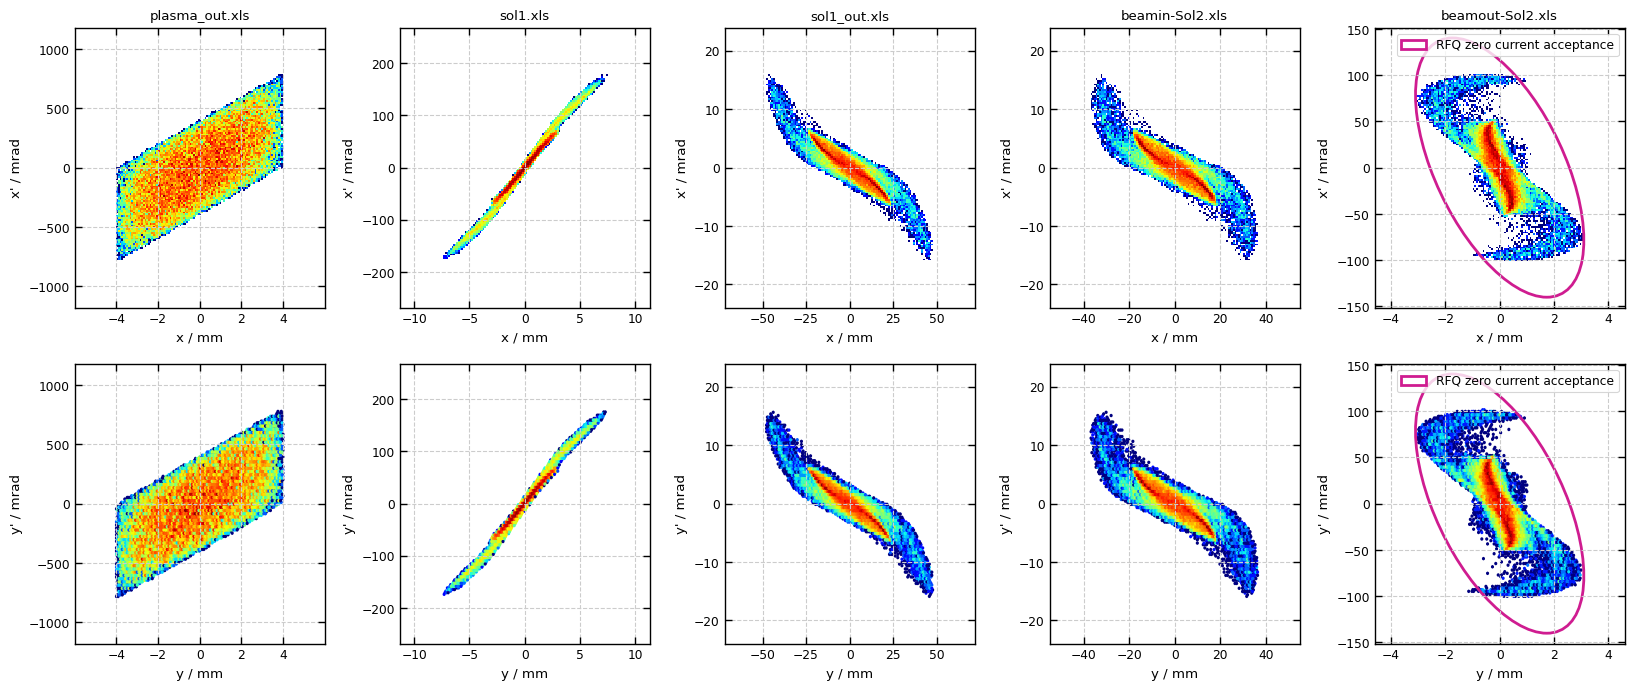

In [133]:
fig2 = plot_beam_size_evolution('AVG47.xls','RMS47.xls', 'DEADRAY47.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.2f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.2f}$\,$A, beam current 35$\,$mA, SC 0.0006 mA, source PlasmaOut.dat.".format(106.72 ,101.21), 51006, [0.1, 0.3])
plot_PS("./PS47/", ["plasma_out.xls", "sol1.xls", "sol1_out.xls", "beamin-Sol2.xls", "beamout-Sol2.xls"])
# Maximum transmission through RFQ mask for PlasmaOut 35 mA, 0.0006 mA spc, LEBT_complete.in:
#               sol1 0.736/106.72 A and sol2 0.698/101.21 A 84.96%

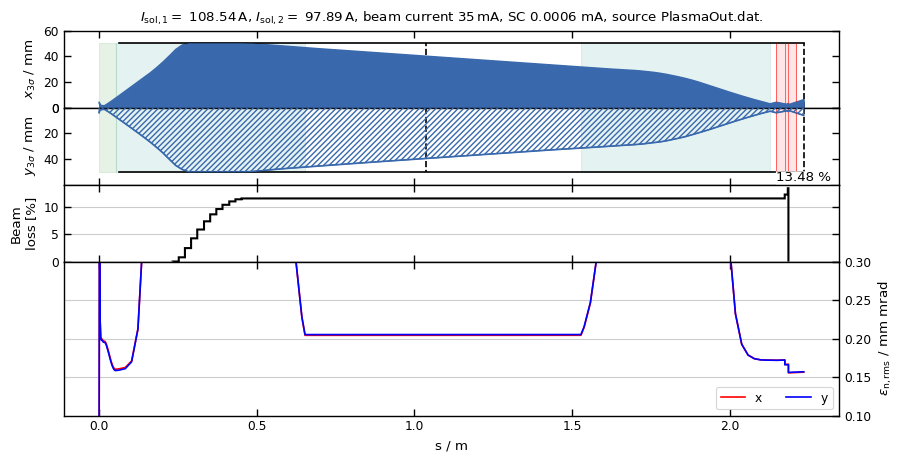

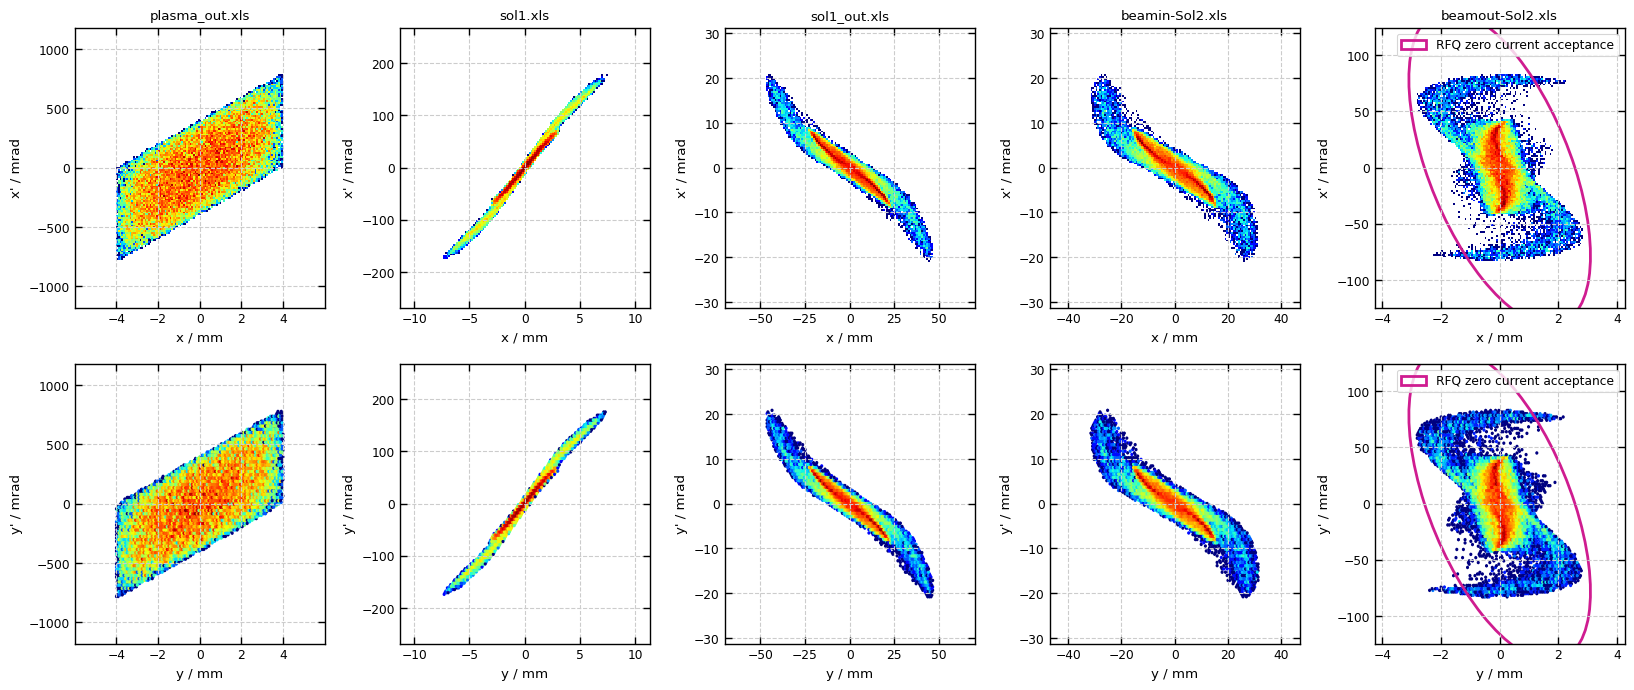

In [134]:
fig2 = plot_beam_size_evolution('AVG48.xls','RMS48.xls', 'DEADRAY48.xls', r"$I_{{\mathrm{{sol}},1}}=$ {:.2f}$\,$A, $I_{{\mathrm{{sol}},2}}=$ {:.2f}$\,$A, beam current 35$\,$mA, SC 0.0006 mA, source PlasmaOut.dat.".format(108.54108366,  97.88789078), 51006, [0.1, 0.3])
plot_PS("./PS48/", ["plasma_out.xls", "sol1.xls", "sol1_out.xls", "beamin-Sol2.xls", "beamout-Sol2.xls"])

35mA GA matching for transmission

**n_gen  |  n_eval  |     f_avg     |     f_min     |            I_sol1, I_sol2**


     1 |       40 |  8.771395E+01 |  2.146414E+01 |          [111.95225535  83.46856543]
     2 |       80 |  7.162956E+01 |  1.860369E+01 |          [107.12481215 103.69765925]
     3 |      120 |  4.926087E+01 |  1.827432E+01 |          [126.92900876 135.35507495]
     4 |      160 |  3.158584E+01 |  1.792926E+01 |          [126.92900876 135.52490703]
     5 |      200 |  2.470695E+01 |  1.612163E+01 |          [106.7862014  100.44479534]
     6 |      240 |  1.996829E+01 |  1.541191E+01 |          [105.45960733 103.69765925]
     7 |      280 |  1.839259E+01 |  1.541191E+01 |          [105.45960733 103.69765925]
     8 |      320 |  1.769723E+01 |  1.530604E+01 |          [106.76158999 101.55669199]
     9 |      360 |  1.722503E+01 |  1.509626E+01 |          [106.19269429 102.0069336 ]
    10 |      400 |  1.680567E+01 |  1.509626E+01 |          [106.19269429 102.0069336 ]
    11 |      440 |  1.609232E+01 |  1.509626E+01 |          [106.19269429 102.0069336 ]
    12 |      480 |  1.577746E+01 |  1.509626E+01 |          [106.19269429 102.0069336 ]
    13 |      520 |  1.560606E+01 |  1.505705E+01 |          [106.76027291 101.06644227]
    14 |      560 |  1.541226E+01 |  1.505313E+01 |          [106.63154214 101.44114448]
    15 |      600 |  1.528707E+01 |  1.505313E+01 |          [106.63154214 101.44114448]
    16 |      640 |  1.520287E+01 |  1.505313E+01 |          [106.63154214 101.44114448]
    17 |      680 |  1.516395E+01 |  1.505313E+01 |          [106.63154214 101.44114448]
    18 |      720 |  1.512729E+01 |  1.505313E+01 |          [106.63154214 101.44114448]
    19 |      760 |  1.509935E+01 |  1.505313E+01 |          [106.63154214 101.44114448]
    20 |      800 |  1.508891E+01 |  1.505313E+01 |          [106.63154214 101.44114448]